In [2]:
import pandas as pd

In [2]:
df = pd.read_csv("combined_activity_data.csv")

In [3]:
df.shape

(322484, 23)

In [4]:
df.head()

,time,Accelerometer_X (m/s^2),Accelerometer_Y (m/s^2),Accelerometer_Z (m/s^2),Barometer_X (hPa),Gyroscope_X (rad/s),Gyroscope_Y (rad/s),Gyroscope_Z (rad/s),Linear Accelerometer_X (m/s^2),Linear Accelerometer_Y (m/s^2),...,Location_Height (m),Location_Velocity (m/s),Location_Direction (°),Location_Horizontal Accuracy (m),Location_Vertical Accuracy (°),Magnetometer_X (µT),Magnetometer_Y (µT),Magnetometer_Z (µT),Proximity_Distance (cm),activity_type
0,-0.550052,NaN,NaN,NaN,962.943039,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high knees
1,0.002592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,high knees
2,0.005252,-1.987866,8.093070,7.005881,NaN,-2.149649,-2.085586,-0.530086,0.267578,3.030079,...,NaN,NaN,NaN,NaN,NaN,30.541458,-19.370588,-30.912743,NaN,high knees
3,0.015250,-1.441053,7.954608,9.053473,NaN,-2.896742,-1.588549,-0.930908,0.698092,3.114524,...,NaN,NaN,NaN,NaN,NaN,30.266312,-18.767439,-31.396454,NaN,high knees
4,0.025248,-0.438887,8.194859,12.630585,NaN,-3.420725,-0.777714,-1.379088,1.654562,3.643801,...,NaN,NaN,NaN,NaN,NaN,30.146378,-18.093246,-31.881290,NaN,high knees


In [5]:
import pandas as pd
import os

def get_recording_durations():
    base_data_path = 'data'
    activity_folders = ['high knees', 'normal run', 'side skips', 'sprints', 'standing', 'walking']
    sensor_files = [
        'Accelerometer.csv',
        'Barometer.csv',
        'Gyroscope.csv',
        'Linear Accelerometer.csv',
        'Location.csv',
        'Magnetometer.csv',
        'Proximity.csv'
    ]

    print("Recording Durations for each CSV:\n")
    all_durations_data = [] # To store data for DataFrame

    for activity in activity_folders:
        print(f"--- Activity: {activity} ---")
        activity_path = os.path.join(base_data_path, activity)

        if not os.path.isdir(activity_path):
            print(f"  Directory not found. Skipping.")
            all_durations_data.append({'Activity': activity, 'Sensor File': 'N/A', 'Duration (s)': 'Directory not found', 'Min Time': 'N/A', 'Max Time': 'N/A'})
            continue

        for sensor_file_name in sensor_files:
            file_path = os.path.join(activity_path, sensor_file_name)
            duration_str = "Not processed"
            min_time_str = "N/A"
            max_time_str = "N/A"
            
            if not os.path.exists(file_path):
                print(f"  {sensor_file_name}: File not found.")
                duration_str = "File not found"
                all_durations_data.append({'Activity': activity, 'Sensor File': sensor_file_name, 'Duration (s)': duration_str, 'Min Time': min_time_str, 'Max Time': max_time_str})
                continue

            try:
                df = pd.read_csv(file_path)
                
                time_col_name = None
                for col in df.columns:
                    if col.lower() == 'time (s)': # Case-insensitive check
                        time_col_name = col
                        break
                
                if not time_col_name:
                    print(f"  {sensor_file_name}: 'Time (s)' column not found.")
                    duration_str = "'Time (s)' column not found"
                    all_durations_data.append({'Activity': activity, 'Sensor File': sensor_file_name, 'Duration (s)': duration_str, 'Min Time': min_time_str, 'Max Time': max_time_str})
                    continue

                # Ensure the time column is numeric, coercing errors to NaT/NaN
                df[time_col_name] = pd.to_numeric(df[time_col_name], errors='coerce')
                
                # Drop rows where time is NaN after coercion, as they can't be used for min/max
                df_valid_time = df.dropna(subset=[time_col_name])

                if df_valid_time[time_col_name].count() < 2: 
                    print(f"  {sensor_file_name}: Not enough valid data points to calculate duration (found {df_valid_time[time_col_name].count()}).")
                    duration_str = f"Not enough data points ({df_valid_time[time_col_name].count()})"
                    if df_valid_time[time_col_name].count() == 1:
                        min_time_val = df_valid_time[time_col_name].min()
                        max_time_val = df_valid_time[time_col_name].max() # will be same as min
                        min_time_str = f"{min_time_val:.2f}"
                        max_time_str = f"{max_time_val:.2f}"
                    all_durations_data.append({'Activity': activity, 'Sensor File': sensor_file_name, 'Duration (s)': duration_str, 'Min Time': min_time_str, 'Max Time': max_time_str})
                    continue
                
                min_time_val = df_valid_time[time_col_name].min()
                max_time_val = df_valid_time[time_col_name].max()
                duration_val = max_time_val - min_time_val
                
                duration_str = f"{duration_val:.2f}"
                min_time_str = f"{min_time_val:.2f}"
                max_time_str = f"{max_time_val:.2f}"
                print(f"  {sensor_file_name}: Duration: {duration_str}s (Min: {min_time_str}s, Max: {max_time_str}s)")
                all_durations_data.append({'Activity': activity, 'Sensor File': sensor_file_name, 'Duration (s)': duration_str, 'Min Time': min_time_str, 'Max Time': max_time_str})

            except Exception as e:
                duration_str = f"Error: {e}"
                print(f"  {sensor_file_name}: Error processing file - {e}")
                all_durations_data.append({'Activity': activity, 'Sensor File': sensor_file_name, 'Duration (s)': duration_str, 'Min Time': min_time_str, 'Max Time': max_time_str})
        print("\n") 

    # For a nicer overview, convert the collected data to a pandas DataFrame
    durations_df = pd.DataFrame(all_durations_data)
    
    print("\\n--- Summary of Recording Durations ---")
    print(durations_df)
    
    return durations_df

# To run this in your notebook:
# durations_table = get_recording_durations()
# To see the table if it's wide:
# pd.set_option('display.max_columns', None) 
# pd.set_option('display.width', 1000) 
# print(durations_table)


In [6]:
durations_table = get_recording_durations()
    # Optional: for better display of the DataFrame if it's wide
    # import pandas as pd # if not already imported in the cell
    # pd.set_option('display.max_columns', None) 
    # pd.set_option('display.width', 1000) # Adjust width as needed
    # print(durations_table)

Recording Durations for each CSV:

--- Activity: high knees ---
  Accelerometer.csv: Duration: 150.28s (Min: 0.01s, Max: 150.28s)
  Barometer.csv: Duration: 147.96s (Min: -0.55s, Max: 147.41s)
  Gyroscope.csv: Duration: 150.43s (Min: 0.01s, Max: 150.44s)
  Linear Accelerometer.csv: Duration: 150.35s (Min: 0.01s, Max: 150.36s)
  Location.csv: Duration: 148.81s (Min: 0.85s, Max: 149.66s)
  Magnetometer.csv: Duration: 150.52s (Min: 0.01s, Max: 150.53s)
  Proximity.csv: Duration: 139.93s (Min: 0.00s, Max: 139.93s)


--- Activity: normal run ---
  Accelerometer.csv: Duration: 573.16s (Min: 0.00s, Max: 573.16s)
  Barometer.csv: Duration: 570.01s (Min: -0.52s, Max: 569.49s)
  Gyroscope.csv: Duration: 573.13s (Min: 0.03s, Max: 573.16s)
  Linear Accelerometer.csv: Duration: 573.13s (Min: 0.03s, Max: 573.16s)
  Location.csv: Duration: 572.43s (Min: 0.03s, Max: 572.46s)
  Magnetometer.csv: Duration: 573.13s (Min: 0.03s, Max: 573.16s)
  Proximity.csv: Duration: 430.67s (Min: 0.03s, Max: 430.71s)



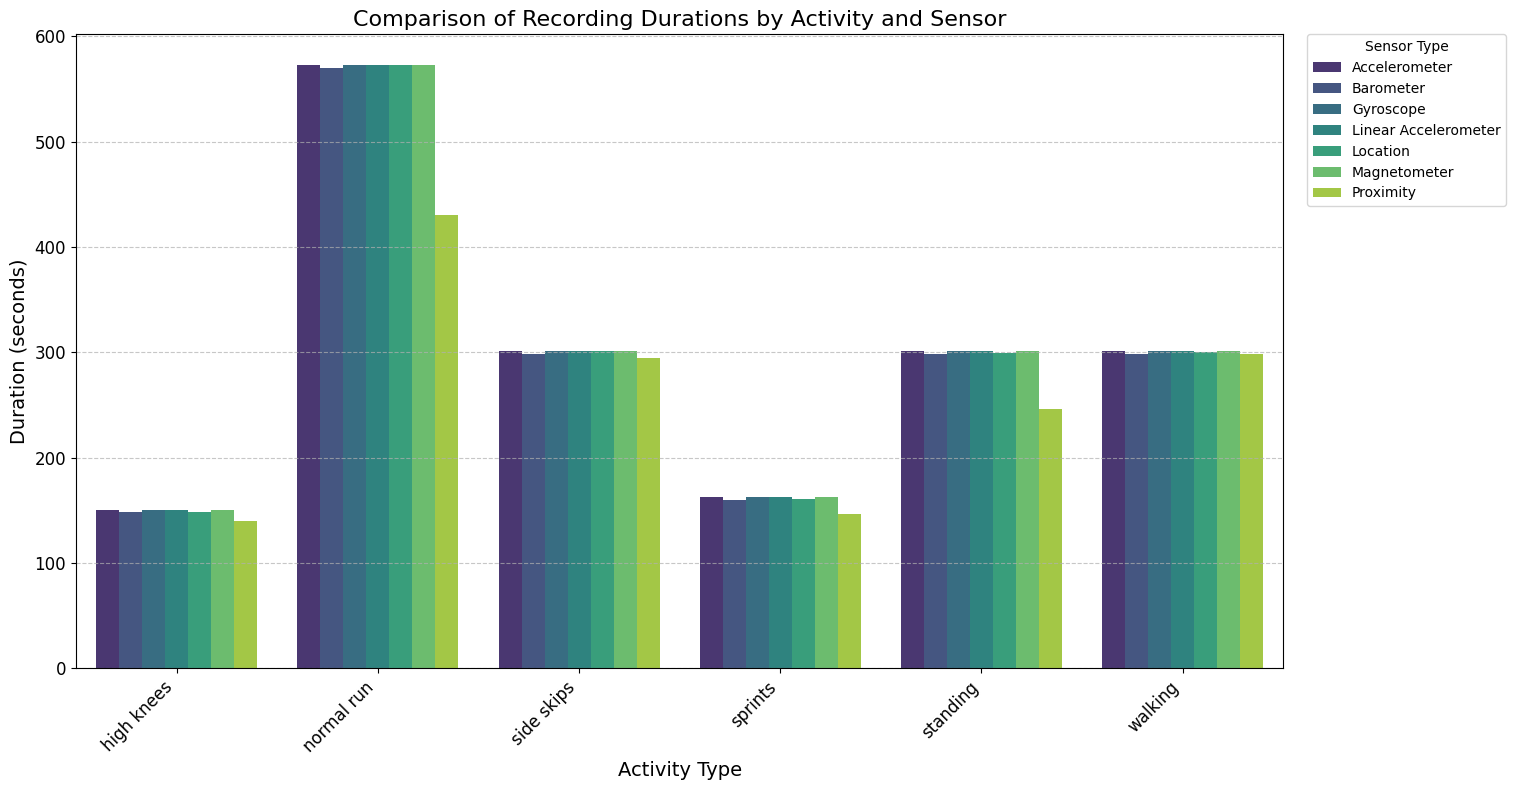

In [33]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

def get_durations_for_plotting():
    base_data_path = 'data'
    activity_folders = ['high knees', 'normal run', 'side skips', 'sprints', 'standing', 'walking']
    sensor_files = [
        'Accelerometer.csv', 'Barometer.csv', 'Gyroscope.csv',
        'Linear Accelerometer.csv', 'Location.csv', 'Magnetometer.csv', 'Proximity.csv'
    ]
    time_column_name_target = 'time (s)'
    plot_data = []

    for activity in activity_folders:
        activity_path = os.path.join(base_data_path, activity)
        if not os.path.isdir(activity_path):
            # Optionally skip or add placeholder if activity folder missing
            continue

        for sensor_file_name in sensor_files:
            file_path = os.path.join(activity_path, sensor_file_name)
            duration_val = None # Use None for missing/error data

            if not os.path.exists(file_path):
                pass # duration_val remains None
            else:
                try:
                    df = pd.read_csv(file_path)
                    actual_time_col = None
                    for col in df.columns:
                        if col.lower() == time_column_name_target:
                            actual_time_col = col
                            break
                    
                    if actual_time_col:
                        df[actual_time_col] = pd.to_numeric(df[actual_time_col], errors='coerce')
                        valid_time_series = df[actual_time_col].dropna()
                        if len(valid_time_series) >= 2:
                            duration_val = valid_time_series.max() - valid_time_series.min()
                        elif len(valid_time_series) == 1:
                             duration_val = 0.0 # Or treat as invalid for plotting
                except Exception:
                    pass # duration_val remains None
            
            if duration_val is not None: # Only add if duration could be calculated
                 plot_data.append({
                    'Activity': activity,
                    'Sensor File': sensor_file_name.replace('.csv', ''), # Cleaner name for legend
                    'Duration (s)': duration_val
                })

    return pd.DataFrame(plot_data)

# --- Generate data and plot ---

# 1. Get the data in a plottable format
durations_for_plot_df = get_durations_for_plotting()

if durations_for_plot_df.empty:
    print("No data available to plot. Please check file paths and contents.")
else:
    # 2. Create the plot
    plt.figure(figsize=(18, 8)) # Adjust figure size as needed
    
    sns.barplot(
        x='Activity',
        y='Duration (s)',
        hue='Sensor File',
        data=durations_for_plot_df,
        palette='viridis' # You can choose other palettes like 'muted', 'bright', etc.
    )
    
    plt.title('Comparison of Recording Durations by Activity and Sensor', fontsize=16)
    plt.xlabel('Activity Type', fontsize=14)
    plt.ylabel('Duration (seconds)', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12) # Rotate x-axis labels for better readability
    plt.yticks(fontsize=12)
    plt.legend(title='Sensor Type', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.) # Place legend outside
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend if it's outside
    
    # Show the plot
    plt.savefig("plots/durations_by_activity.png")
    plt.show()

    # Optional: Print the DataFrame used for plotting if you want to see the exact numbers
    # print("\nData used for plotting:")
    # print(durations_for_plot_df)

In [7]:
df_prox = pd.read_csv("data/high knees/Proximity.csv")

In [8]:
df_prox.head()

,Time (s),Distance (cm)
0,0.002592,5.0
1,3.177970,0.0
2,3.278005,5.0
3,4.527685,0.0
4,4.561000,5.0


In [10]:
df_prox['Distance (cm)'].value_counts()

Distance (cm)
5.0    29
0.0    25
Name: count, dtype: int64

In [16]:
import pandas as pd
import os

def investigate_recording_times():
    base_data_path = 'data'
    activity_folders = ['high knees', 'normal run', 'side skips', 'sprints', 'standing', 'walking']
    sensor_files = [
        'Accelerometer.csv', 'Barometer.csv', 'Gyroscope.csv',
        'Linear Accelerometer.csv', 'Location.csv', 'Magnetometer.csv', 'Proximity.csv'
    ]
    time_column_name_target = 'time (s)' # The column name we are looking for (case-insensitive)

    print("Detailed Recording Information for each CSV:\n")
    detailed_data = []

    for activity in activity_folders:
        activity_path = os.path.join(base_data_path, activity)
        if not os.path.isdir(activity_path):
            detailed_data.append({
                'Activity': activity, 'Sensor File': 'N/A', 'Row Count': 'N/A',
                'Valid Times': 'N/A', 'Min Time (s)': 'N/A',
                'Max Time (s)': 'N/A', 'Duration (s)': 'Directory not found'
            })
            continue

        for sensor_file_name in sensor_files:
            file_path = os.path.join(activity_path, sensor_file_name)
            row_count, valid_times, min_time, max_time, duration = "N/A", "N/A", "N/A", "N/A", "File not found"

            if not os.path.exists(file_path):
                pass # Handled by default values
            else:
                try:
                    df = pd.read_csv(file_path)
                    row_count = len(df)
                    
                    actual_time_col = None
                    for col in df.columns:
                        if col.lower() == time_column_name_target:
                            actual_time_col = col
                            break
                    
                    if not actual_time_col:
                        duration = f"'{time_column_name_target}' column not found"
                    else:
                        df[actual_time_col] = pd.to_numeric(df[actual_time_col], errors='coerce')
                        valid_time_series = df[actual_time_col].dropna()
                        valid_times = len(valid_time_series)

                        if valid_times >= 2:
                            min_time = valid_time_series.min()
                            max_time = valid_time_series.max()
                            duration = max_time - min_time
                        elif valid_times == 1:
                            min_time = valid_time_series.iloc[0]
                            max_time = min_time
                            duration = 0.0
                        else:
                            duration = "Not enough data"
                except Exception as e:
                    duration = f"Error: {e}"

            detailed_data.append({
                'Activity': activity, 'Sensor File': sensor_file_name, 'Row Count': row_count,
                'Valid Times': valid_times,
                'Min Time (s)': f"{min_time:.3f}" if isinstance(min_time, (int, float)) else min_time,
                'Max Time (s)': f"{max_time:.3f}" if isinstance(max_time, (int, float)) else max_time,
                'Duration (s)': f"{duration:.3f}" if isinstance(duration, (int, float)) else duration
            })

    durations_df = pd.DataFrame(detailed_data)
    print("--- Detailed Recording Metrics ---")
    # For better display in notebooks if the table is wide:
    # pd.set_option('display.max_columns', None)
    # pd.set_option('display.width', 120) # Adjust width as needed
    print(durations_df)
    print("\n" + "="*80 + "\n")

    # --- Detailed look at a specific activity and sensors ---
    # You can change this to any activity and other_sensor you want to compare
    activity_to_inspect = 'normal run' # Example: Choose one activity where you see the discrepancy
    proximity_file = 'Proximity.csv'
    other_sensor_file = 'Accelerometer.csv' # Compare with Accelerometer, for instance

    print(f"--- Inspecting Timestamps for Activity: {activity_to_inspect} ---")

    for sensor_to_inspect in [proximity_file, other_sensor_file]:
        file_path = os.path.join(base_data_path, activity_to_inspect, sensor_to_inspect)
        print(f"\n-- Sensor: {sensor_to_inspect} --")
        if not os.path.exists(file_path):
            print("File not found.")
            continue
        try:
            df_inspect = pd.read_csv(file_path)
            actual_time_col_inspect = None
            for col in df_inspect.columns:
                if col.lower() == time_column_name_target:
                    actual_time_col_inspect = col
                    break
            
            if not actual_time_col_inspect:
                print(f"'{time_column_name_target}' column not found.")
                continue

            df_inspect[actual_time_col_inspect] = pd.to_numeric(df_inspect[actual_time_col_inspect], errors='coerce')
            # It's important to drop NaNs *before* taking head/tail of the time column for accurate comparison
            # of actual recorded start/end times, but for seeing raw data, we might keep them.
            # For this inspection, let's look at the raw data first, then consider cleaned.
            
            print(f"Total rows: {len(df_inspect)}")
            print(f"Number of valid (non-NaN) time entries: {df_inspect[actual_time_col_inspect].notna().sum()}")
            
            # Displaying time values even if they are NaN to see the raw file start/end
            print("First 5 timestamps (raw):")
            print(df_inspect[actual_time_col_inspect].head(5))
            print("\nLast 5 timestamps (raw):")
            print(df_inspect[actual_time_col_inspect].tail(5))

            # Min/Max of actual valid time data points
            valid_time_data = df_inspect[actual_time_col_inspect].dropna()
            if not valid_time_data.empty:
                print(f"\nMin valid time: {valid_time_data.min():.3f}")
                print(f"Max valid time: {valid_time_data.max():.3f}")
            else:
                print("\nNo valid time data points found after cleaning.")

        except Exception as e:
            print(f"Error processing {sensor_to_inspect}: {e}")
            
    return durations_df


# To run this in your notebook:
detailed_durations_table = investigate_recording_times()
# To see the table if it's wide:
# import pandas as pd # if not already imported
# pd.set_option('display.max_columns', None) 
# pd.set_option('display.width', 1000) 
# print(detailed_durations_table) # To print the summary DataFrame again if needed

Detailed Recording Information for each CSV:

--- Detailed Recording Metrics ---
      Activity               Sensor File  Row Count  Valid Times Min Time (s)  \
0   high knees         Accelerometer.csv      15030        15030        0.005   
1   high knees             Barometer.csv        139          139       -0.550   
2   high knees             Gyroscope.csv      15043        15043        0.005   
3   high knees  Linear Accelerometer.csv      15035        15035        0.005   
4   high knees              Location.csv        149          149        0.845   
5   high knees          Magnetometer.csv      15052        15052        0.005   
6   high knees             Proximity.csv         54           54        0.003   
7   normal run         Accelerometer.csv      57330        57330        0.003   
8   normal run             Barometer.csv        536          536       -0.522   
9   normal run             Gyroscope.csv      57327        57327        0.032   
10  normal run  Linear Accel

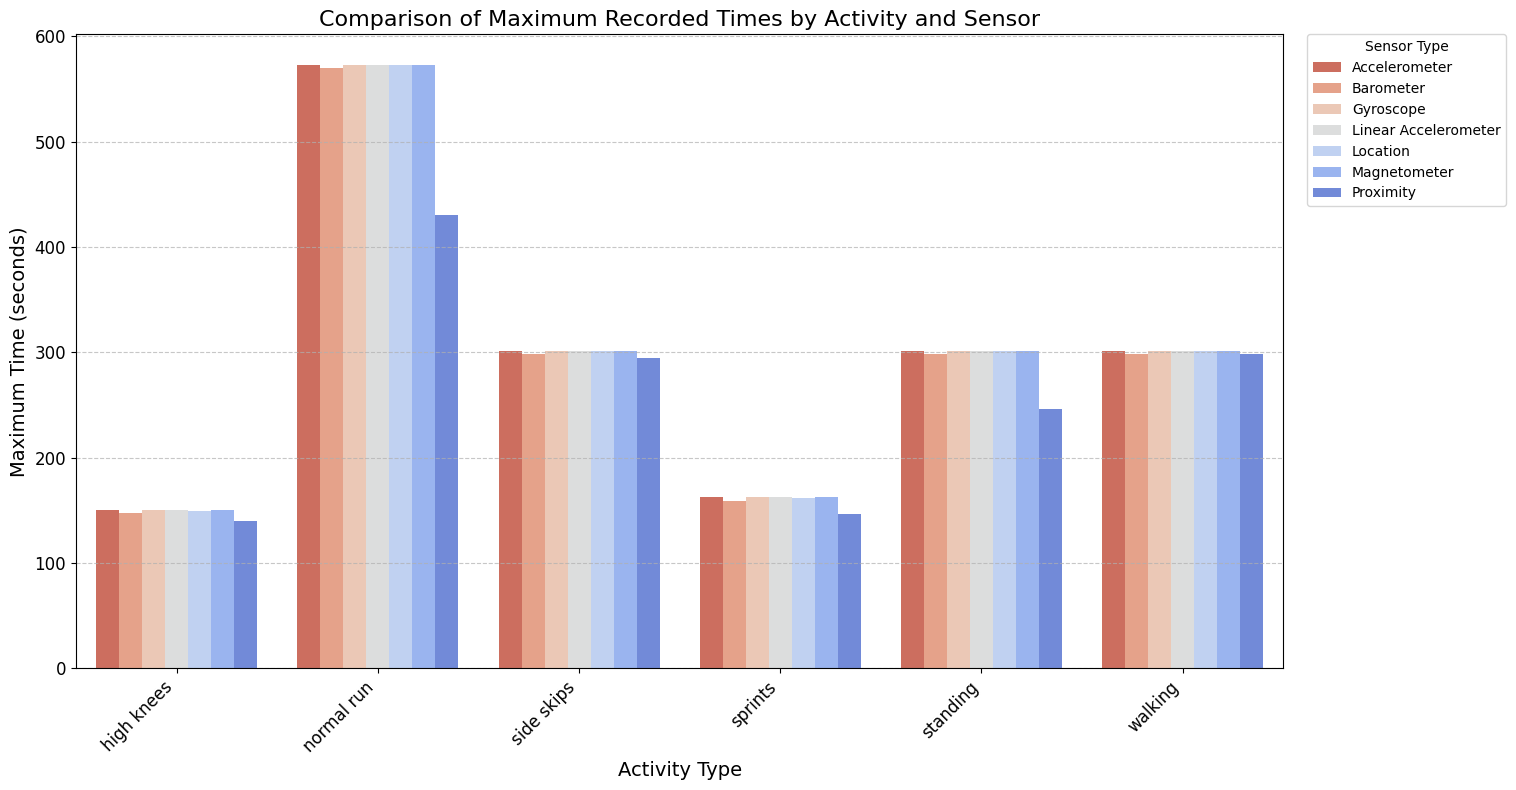

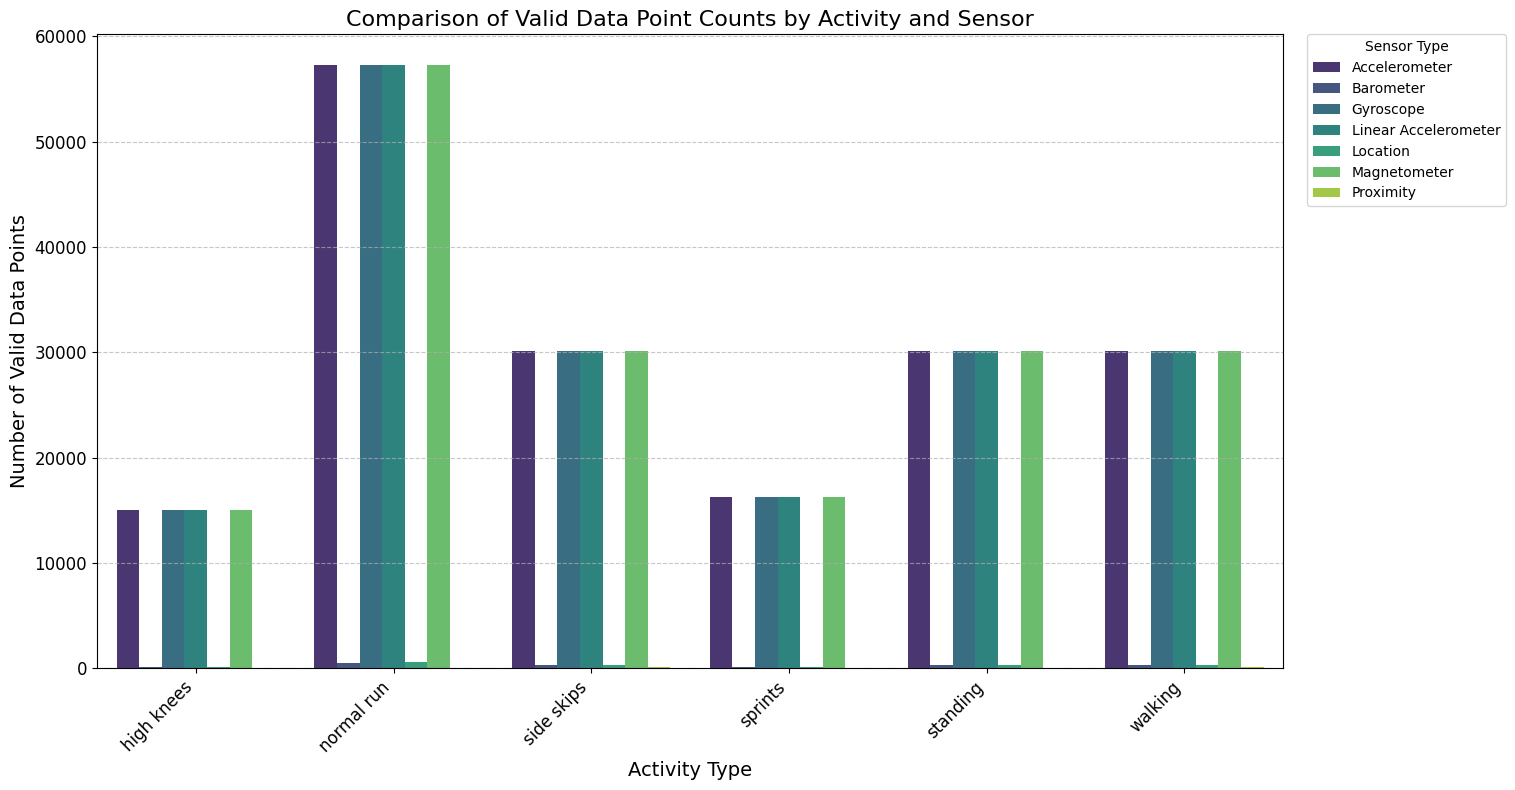

In [18]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

def get_data_for_investigation_plots():
    base_data_path = 'data'
    activity_folders = ['high knees', 'normal run', 'side skips', 'sprints', 'standing', 'walking']
    sensor_files_all = [ # Ensure Proximity is included
        'Accelerometer.csv', 'Barometer.csv', 'Gyroscope.csv',
        'Linear Accelerometer.csv', 'Location.csv', 'Magnetometer.csv', 'Proximity.csv'
    ]
    time_column_name_target = 'time (s)'
    plot_data_list = []

    for activity in activity_folders:
        activity_path = os.path.join(base_data_path, activity)
        if not os.path.isdir(activity_path):
            continue

        for sensor_file_name in sensor_files_all:
            file_path = os.path.join(activity_path, sensor_file_name)
            
            max_time_val = None
            valid_time_count = 0 # Default to 0 if file/column not found or no valid times

            if not os.path.exists(file_path):
                # Keep max_time_val as None, valid_time_count as 0
                pass
            else:
                try:
                    df = pd.read_csv(file_path)
                    actual_time_col = None
                    for col in df.columns:
                        if col.lower() == time_column_name_target:
                            actual_time_col = col
                            break
                    
                    if actual_time_col:
                        df[actual_time_col] = pd.to_numeric(df[actual_time_col], errors='coerce')
                        valid_time_series = df[actual_time_col].dropna()
                        valid_time_count = len(valid_time_series)

                        if valid_time_count > 0: # Need at least one point to have a max time
                            max_time_val = valid_time_series.max()
                        # If valid_time_count is 0, max_time_val remains None
                except Exception:
                    # Error during processing, max_time_val remains None, valid_time_count remains 0
                    pass
            
            # Add data even if max_time_val is None, so we can see missing data in table if needed
            # For plotting, seaborn usually handles None by not plotting that bar for that category.
            plot_data_list.append({
                'Activity': activity,
                'Sensor': sensor_file_name.replace('.csv', ''),
                'Max Time (s)': max_time_val,
                'Valid Data Points': valid_time_count
            })

    return pd.DataFrame(plot_data_list)

# --- Generate data ---
investigation_df = get_data_for_investigation_plots()

if investigation_df.empty:
    print("No data available for plotting. Please check file paths and contents.")
else:
    # --- Plot 1: Maximum Recorded Times ---
    plt.figure(figsize=(18, 8))
    sns.barplot(
        x='Activity',
        y='Max Time (s)',
        hue='Sensor',
        data=investigation_df,
        palette='coolwarm_r' # Using a different palette
    )
    plt.title('Comparison of Maximum Recorded Times by Activity and Sensor', fontsize=16)
    plt.xlabel('Activity Type', fontsize=14)
    plt.ylabel('Maximum Time (seconds)', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Sensor Type', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

    # --- Plot 2: Data Point Counts ---
    plt.figure(figsize=(18, 8))
    sns.barplot(
        x='Activity',
        y='Valid Data Points',
        hue='Sensor',
        data=investigation_df,
        palette='viridis'
    )
    plt.title('Comparison of Valid Data Point Counts by Activity and Sensor', fontsize=16)
    plt.xlabel('Activity Type', fontsize=14)
    plt.ylabel('Number of Valid Data Points', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Sensor Type', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
    # Optional: Use a log scale if data point counts vary extremely widely
    # plt.yscale('log') 
    # plt.ylabel('Number of Valid Data Points (Log Scale)', fontsize=14)
    plt.savefig("plots/datapoint_counts.png")
    plt.show()

    # Optional: Print the DataFrame used for plotting
    # print("\nData used for investigation plots:")
    # print(investigation_df.to_string())

Using a sample of 100000 rows for plotting.


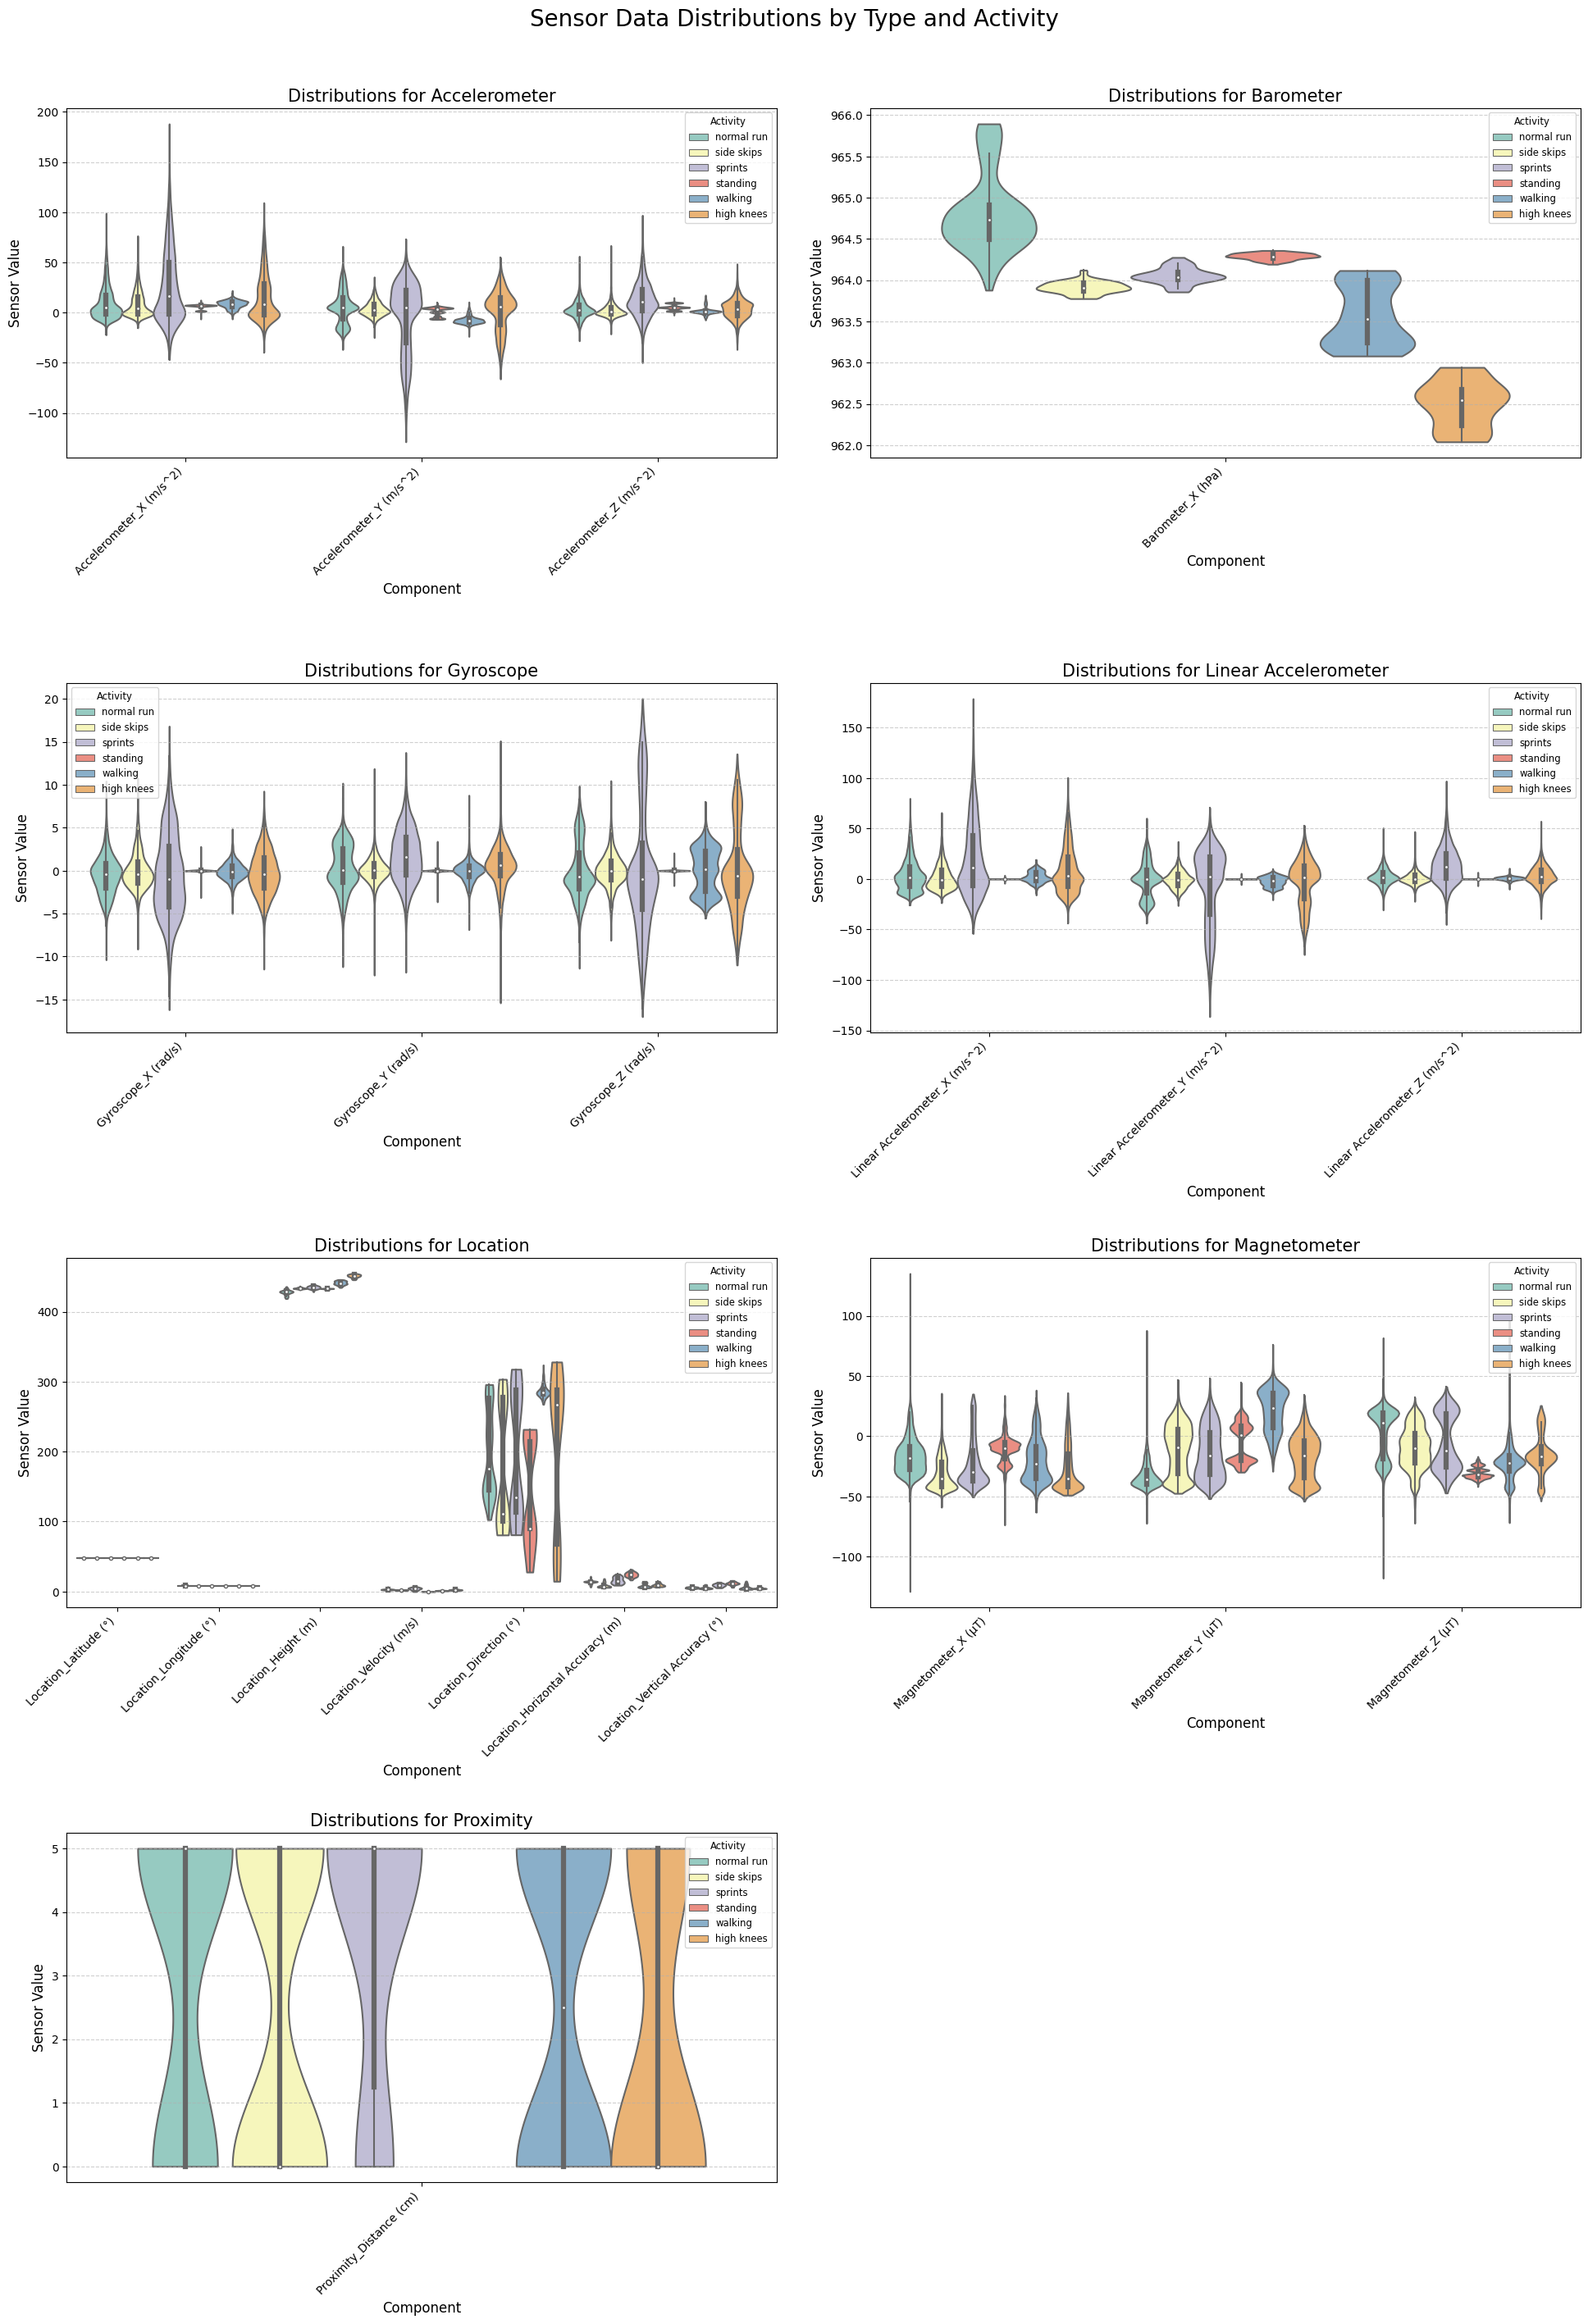

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

# Load the combined data
try:
    combined_df_full = pd.read_csv('combined_activity_data.csv')
except FileNotFoundError:
    print("Error: 'combined_activity_data.csv' not found. Please ensure the file exists.")
    # Exit or handle error appropriately
    exit()

# --- Data Preparation ---

# 1. Global Sample (optional, but recommended for very large data)
sample_size = min(len(combined_df_full), 100000) 
if len(combined_df_full) > sample_size:
    combined_df = combined_df_full.sample(n=sample_size, random_state=42)
    print(f"Using a sample of {sample_size} rows for plotting.")
else:
    combined_df = combined_df_full
    print("Using full dataset for plotting.")

# 2. Identify numeric sensor columns (excluding 'time')
numeric_cols = combined_df.select_dtypes(include=np.number).columns.tolist()
if 'time' in numeric_cols:
    numeric_cols.remove('time')

# 3. Group columns by base sensor name
original_sensor_files_bases = [
    'Accelerometer', 'Barometer', 'Gyroscope',
    'Linear Accelerometer', 'Location', 'Magnetometer', 'Proximity'
]
sensor_groups = {base: [] for base in original_sensor_files_bases}
other_numeric_cols = [] 

for col in numeric_cols:
    found_group = False
    for base_name in original_sensor_files_bases:
        if col.lower().startswith(base_name.lower()):
            sensor_groups[base_name].append(col)
            found_group = True
            break
    if not found_group:
        other_numeric_cols.append(col)

sensor_groups = {k: v for k, v in sensor_groups.items() if v}

if not sensor_groups:
    print("No sensor data columns found to plot. Please check column names in 'combined_activity_data.csv'.")
else:
    # --- Plotting ---
    num_base_sensor_types = len(sensor_groups)
    cols_subplot = 2 
    rows_subplot = int(np.ceil(num_base_sensor_types / cols_subplot))

    fig, axes = plt.subplots(rows_subplot, cols_subplot, figsize=(cols_subplot * 10, rows_subplot * 7), squeeze=False) # Increased figure size a bit
    axes = axes.flatten() 

    current_ax_idx = 0
    for base_sensor_name, component_columns in sensor_groups.items():
        if not component_columns: 
            continue

        ax = axes[current_ax_idx]
        
        columns_for_melt = ['activity_type'] + component_columns
        df_sensor_subset = combined_df[columns_for_melt]
        
        df_melted = df_sensor_subset.melt(
            id_vars=['activity_type'],
            value_vars=component_columns,
            var_name='Sensor Component',
            value_name='Value'
        )
        
        sns.violinplot(
            x='Sensor Component',
            y='Value',
            hue='activity_type',
            data=df_melted,
            ax=ax,
            palette='Set3', 
            cut=0, 
            scale='width' 
        )
        
        ax.set_title(f'Distributions for {base_sensor_name}', fontsize=15)
        ax.set_xlabel('Component', fontsize=12)
        ax.set_ylabel('Sensor Value', fontsize=12)
        
        # Corrected tick label handling for x-axis
        # Get current tick labels to preserve them before setting rotation
        xticklabels = [label.get_text() for label in ax.get_xticklabels()]
        ax.set_xticklabels(xticklabels, rotation=45, ha='right', fontsize=10)
        
        ax.tick_params(axis='y', labelsize=10) # For y-axis label size
        ax.grid(axis='y', linestyle='--', alpha=0.6)
        
        ax.legend(title='Activity', fontsize='small', title_fontsize='small', loc='best')


        current_ax_idx += 1

    for i in range(current_ax_idx, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout(pad=3.0) 
    fig.suptitle('Sensor Data Distributions by Type and Activity', fontsize=20, y=1.02) 
    plt.show()

    if other_numeric_cols:
        print("\nNote: The following numeric columns were not automatically grouped and plotted:")
        for col_name in other_numeric_cols:
            print(f"- {col_name}")

Using a sample of 75000 rows for plotting.

Generating plot for Accelerometer...


/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


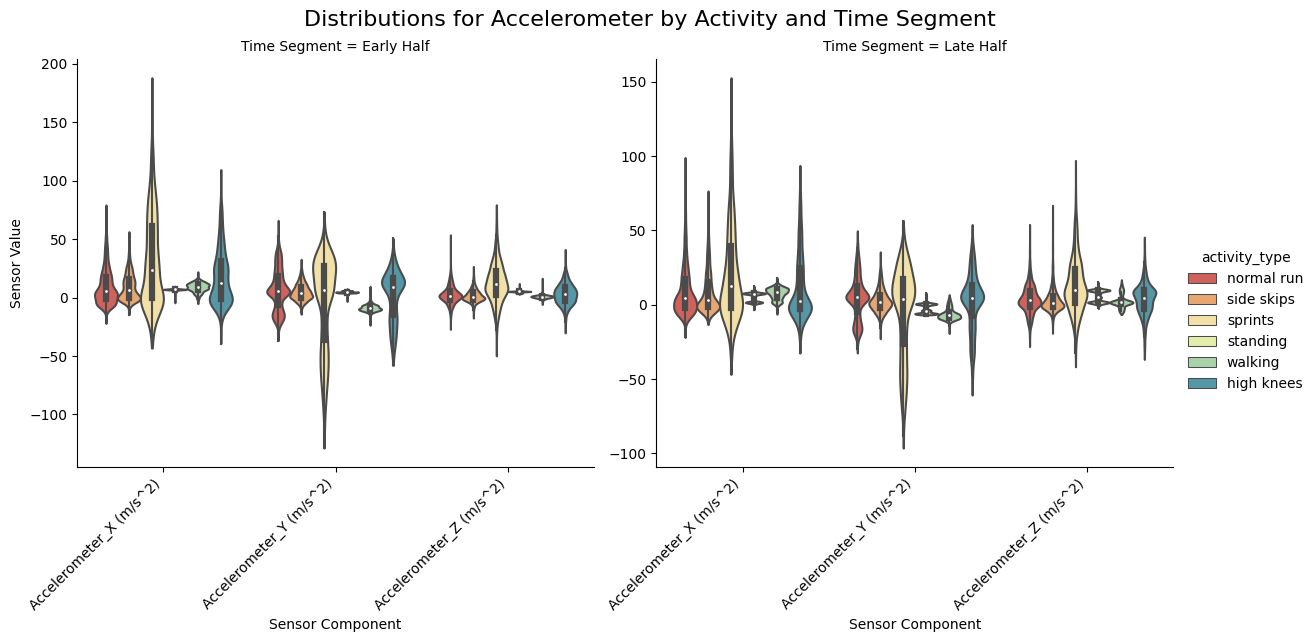


Generating plot for Barometer...


/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


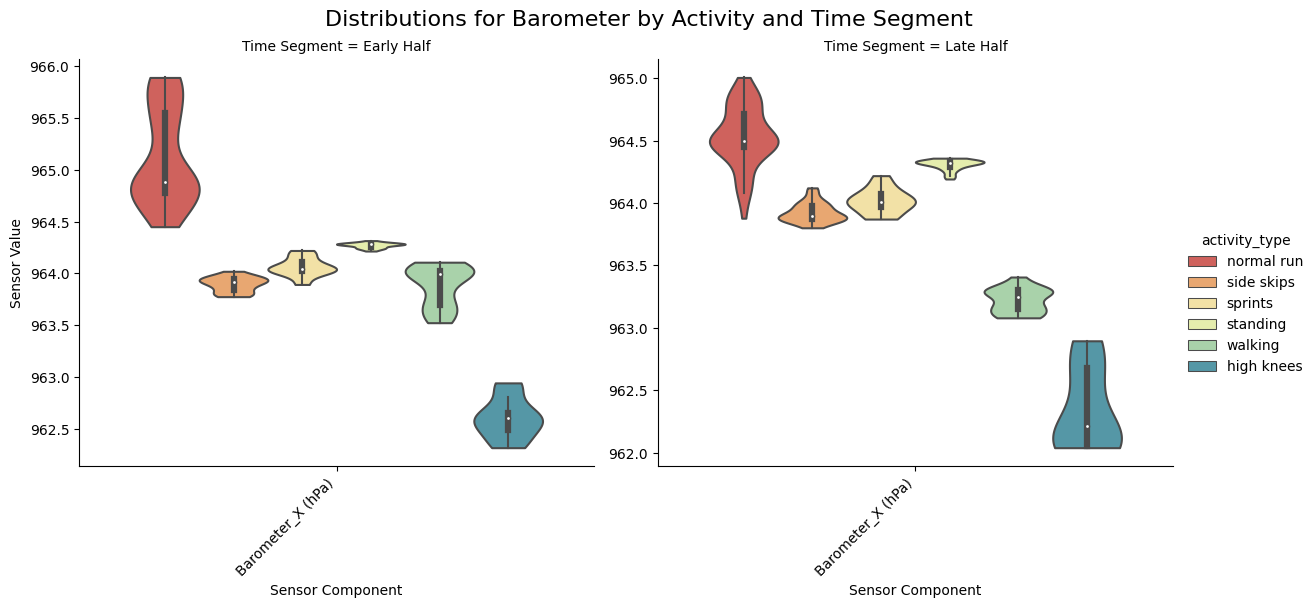


Generating plot for Gyroscope...


/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


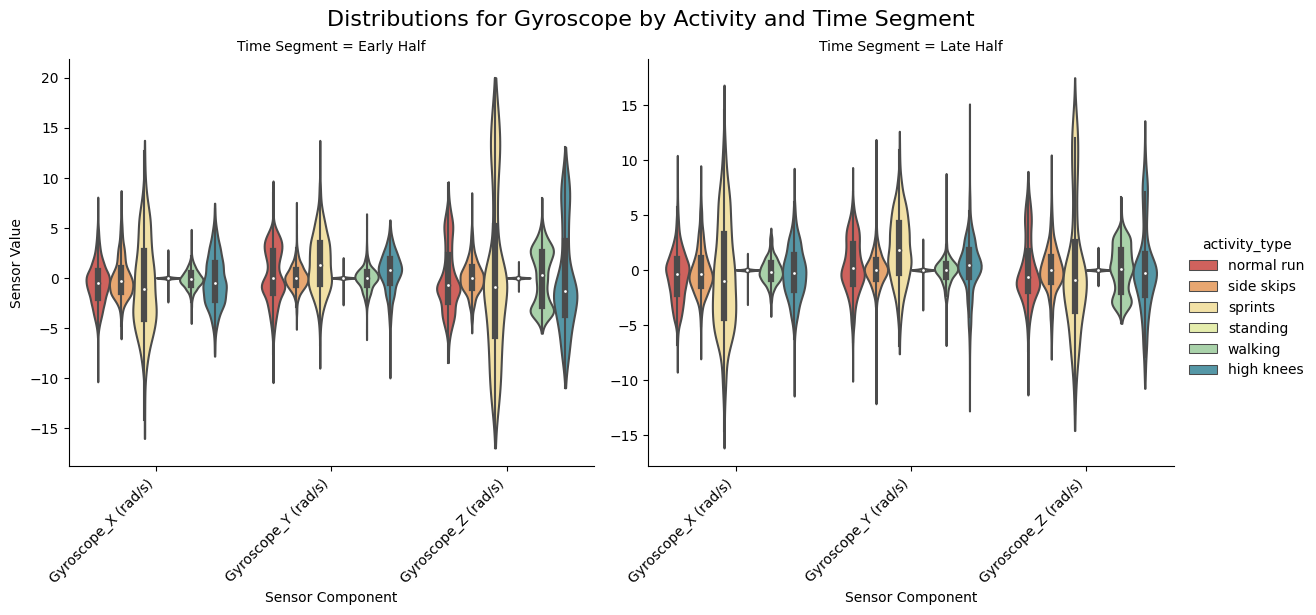


Generating plot for Linear Accelerometer...


/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


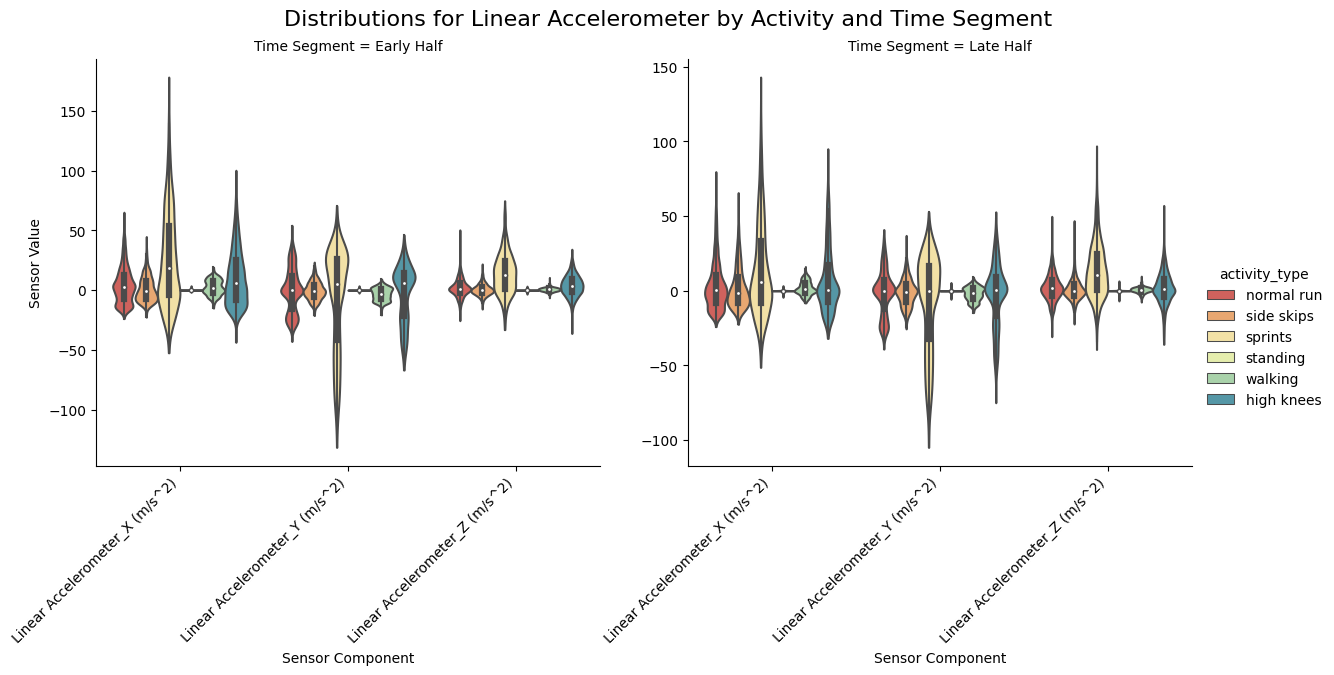


Generating plot for Location...


/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


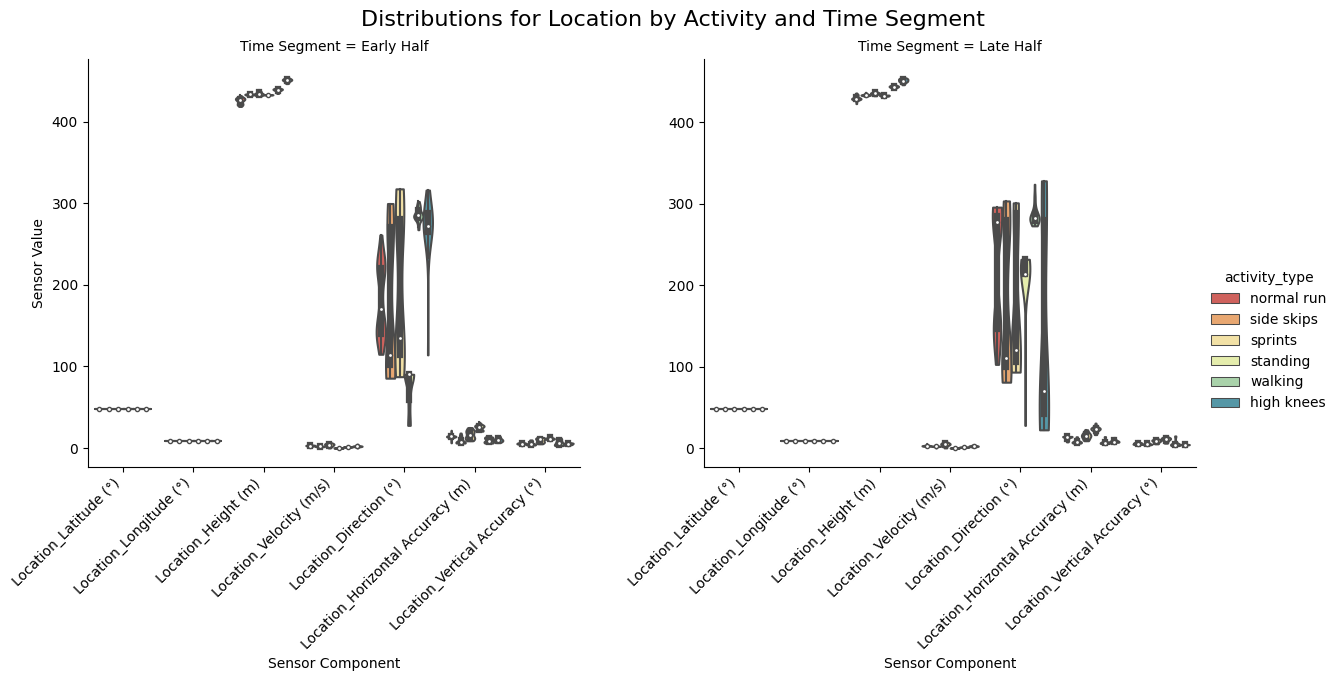


Generating plot for Magnetometer...


/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


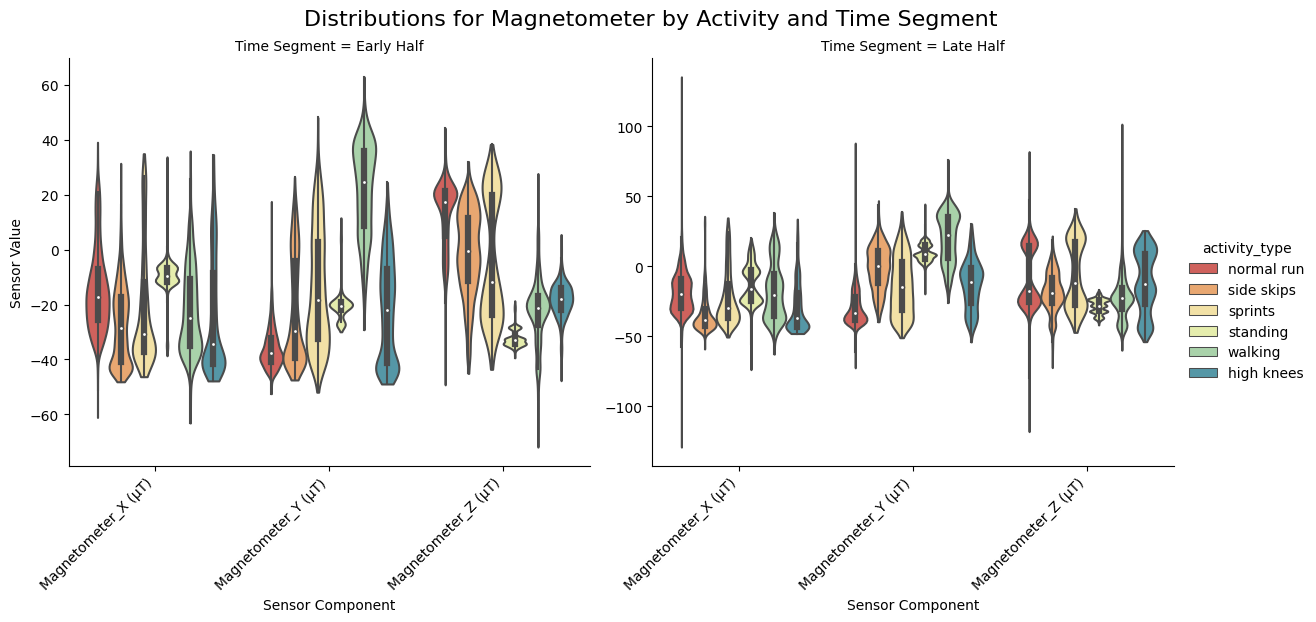


Generating plot for Proximity...


/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


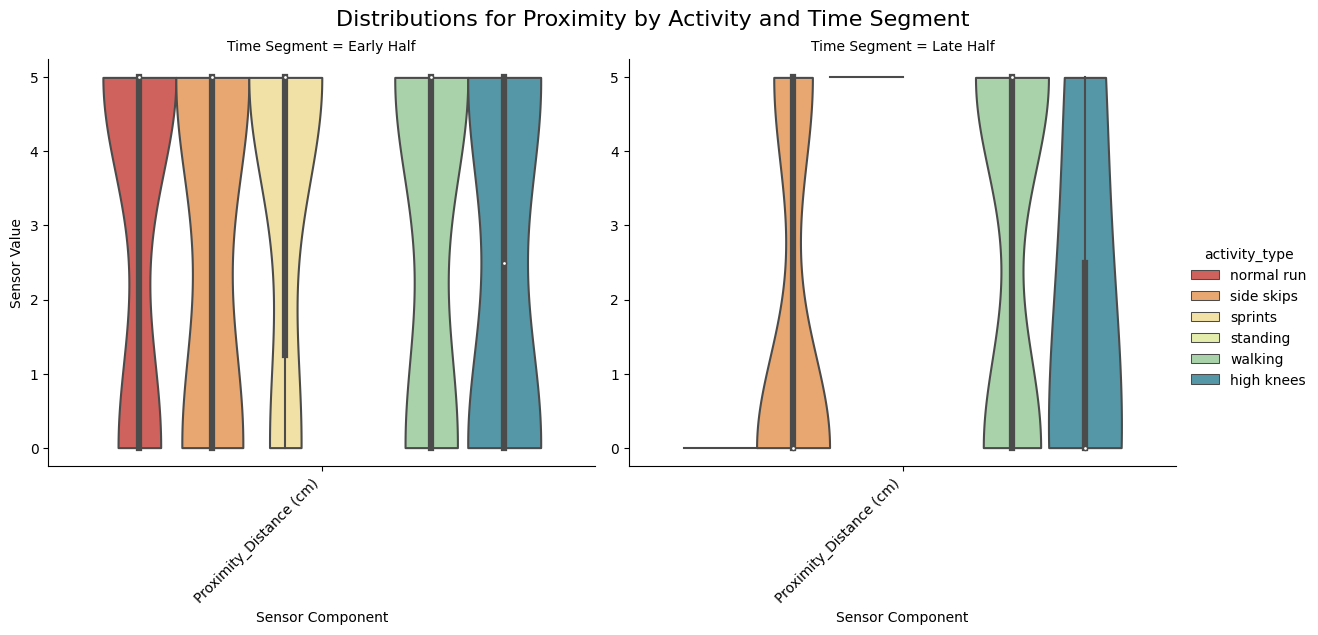

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

# Load the combined data
try:
    combined_df_full = pd.read_csv('combined_activity_data.csv')
except FileNotFoundError:
    print("Error: 'combined_activity_data.csv' not found. Please ensure the file exists.")
    exit()

# --- Data Preparation ---

# 1. Time Segmentation
# Important: Ensure 'time' column is numeric
combined_df_full['time'] = pd.to_numeric(combined_df_full['time'], errors='coerce')
combined_df_full.dropna(subset=['time'], inplace=True) # Remove rows where time could not be coerced

# Create 'Time Segment' column
# We need to do this per activity type, as their durations might differ
combined_df_full['Time Segment'] = '' # Initialize
for activity_name in combined_df_full['activity_type'].unique():
    activity_mask = combined_df_full['activity_type'] == activity_name
    activity_times = combined_df_full.loc[activity_mask, 'time']
    
    if not activity_times.empty:
        min_time = activity_times.min()
        max_time = activity_times.max()
        mid_point = min_time + (max_time - min_time) / 2
        
        combined_df_full.loc[activity_mask, 'Time Segment'] = np.where(
            activity_times <= mid_point, 'Early Half', 'Late Half'
        )

# Filter out any rows where Time Segment might not have been set (if an activity had no time data)
combined_df_full = combined_df_full[combined_df_full['Time Segment'] != '']


# 2. Global Sample (optional, but recommended for very large data)
sample_size = min(len(combined_df_full), 75000) # Adjust sample size
if len(combined_df_full) > sample_size:
    combined_df = combined_df_full.sample(n=sample_size, random_state=42)
    print(f"Using a sample of {sample_size} rows for plotting.")
else:
    combined_df = combined_df_full
    print("Using full dataset for plotting.")


# 3. Identify numeric sensor columns (excluding 'time')
numeric_cols = combined_df.select_dtypes(include=np.number).columns.tolist()
if 'time' in numeric_cols:
    numeric_cols.remove('time')

# 4. Group columns by base sensor name
original_sensor_files_bases = [
    'Accelerometer', 'Barometer', 'Gyroscope',
    'Linear Accelerometer', 'Location', 'Magnetometer', 'Proximity'
]
sensor_groups = {base: [] for base in original_sensor_files_bases}
other_numeric_cols = [] 

for col_name_iter in numeric_cols: # Renamed to avoid conflict with catplot 'col'
    found_group = False
    for base_name in original_sensor_files_bases:
        if col_name_iter.lower().startswith(base_name.lower()):
            sensor_groups[base_name].append(col_name_iter)
            found_group = True
            break
    if not found_group:
        other_numeric_cols.append(col_name_iter)

sensor_groups = {k: v for k, v in sensor_groups.items() if v}

if not sensor_groups:
    print("No sensor data columns found to plot after processing. Please check data and column names.")
else:
    # --- Plotting: One catplot figure per base_sensor_type ---
    for base_sensor_name, component_columns in sensor_groups.items():
        if not component_columns:
            print(f"Skipping {base_sensor_name} as it has no component columns.")
            continue

        print(f"\nGenerating plot for {base_sensor_name}...")
        
        # Prepare data for this base sensor
        columns_for_melt = ['activity_type', 'Time Segment'] + component_columns
        df_sensor_subset = combined_df[columns_for_melt].copy() # Use .copy() to avoid SettingWithCopyWarning
        
        df_melted = df_sensor_subset.melt(
            id_vars=['activity_type', 'Time Segment'],
            value_vars=component_columns,
            var_name='Sensor Component',
            value_name='Value'
        )
        
        # Create the catplot
        g = sns.catplot(
            x='Sensor Component',
            y='Value',
            hue='activity_type',
            col='Time Segment', # Facet by time segment
            data=df_melted,
            kind='violin',
            palette='Spectral', # Example palette
            height=5, # Height of each facet
            aspect=1.2, # Aspect ratio of each facet
            cut=0,
            scale='width',
            sharey=False, # Allow y-axes to differ per facet
            col_wrap=2 # If you have more than 2 time segments, this wraps them
        )
        
        # Aesthetics and titles
        g.fig.suptitle(f'Distributions for {base_sensor_name} by Activity and Time Segment', fontsize=16, y=1.03)
        g.set_axis_labels('Sensor Component', 'Sensor Value')
        g.set_xticklabels(rotation=45, ha='right', fontsize=10)
        
        # Adjust legend - catplot usually handles its own legend well
        # If needed, access legend via g.legend or g._legend
        
        plt.show()

    if other_numeric_cols:
        print("\nNote: The following numeric columns were not automatically grouped and plotted:")
        for col_name_item in other_numeric_cols: # Renamed to avoid conflict
            print(f"- {col_name_item}")


Using a sample of up to 200 points per activity for plotting time series.

Generating time series plots for Accelerometer...


/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/l9/ktthm47x39n329gvdz4tbyyw0000gn/T/ipykernel_19384/2940513412.py:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(current_xticklabels, rotation=30, ha='right', fontsize=9)
/var/folders/l9/ktthm47x39n329gvdz4tbyyw0000gn/T/ipykernel_19384/2940513412.py:111: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.97]) # Adjust rect to prevent suptitle overlap if needed


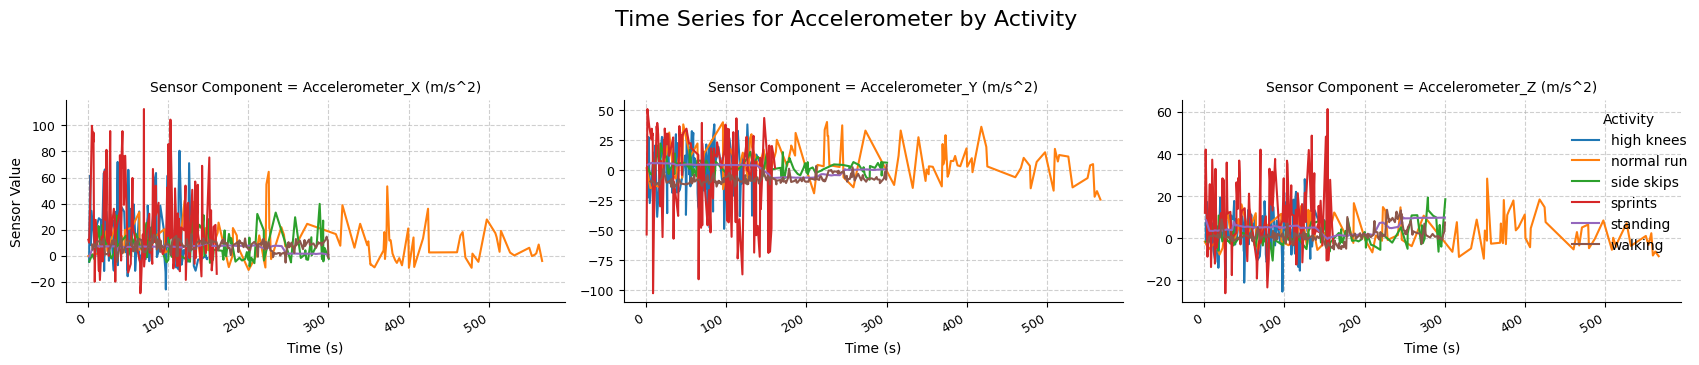


Generating time series plots for Barometer...


/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/l9/ktthm47x39n329gvdz4tbyyw0000gn/T/ipykernel_19384/2940513412.py:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(current_xticklabels, rotation=30, ha='right', fontsize=9)
/var/folders/l9/ktthm47x39n329gvdz4tbyyw0000gn/T/ipykernel_19384/2940513412.py:111: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.97]) # Adjust rect to prevent suptitle overlap if needed


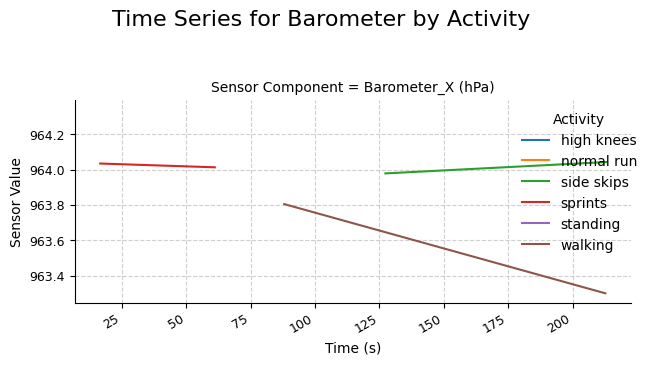


Generating time series plots for Gyroscope...


/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/l9/ktthm47x39n329gvdz4tbyyw0000gn/T/ipykernel_19384/2940513412.py:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(current_xticklabels, rotation=30, ha='right', fontsize=9)
/var/folders/l9/ktthm47x39n329gvdz4tbyyw0000gn/T/ipykernel_19384/2940513412.py:111: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.97]) # Adjust rect to prevent suptitle overlap if needed


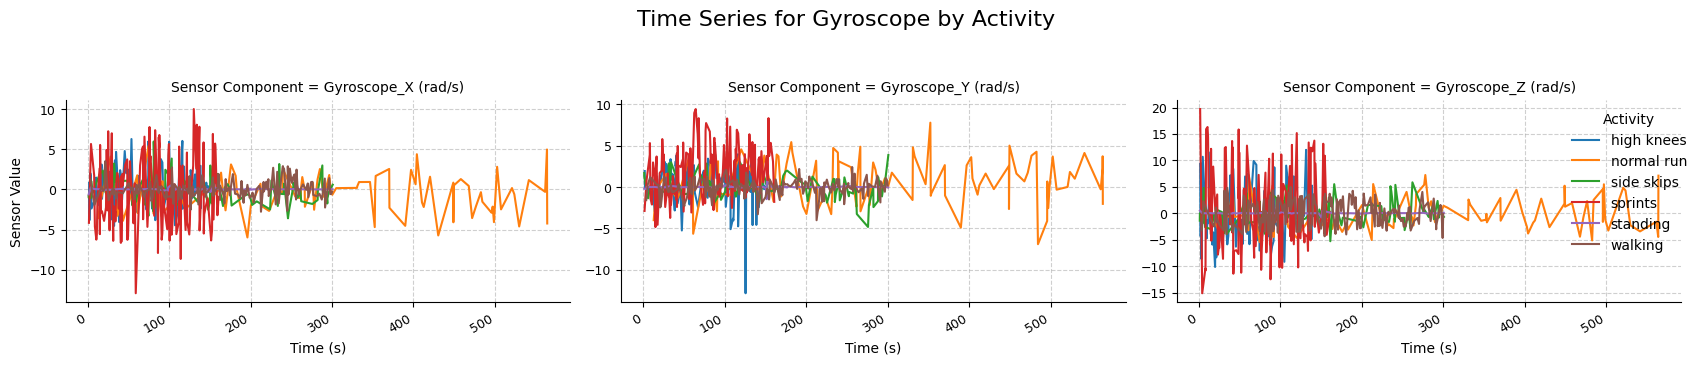


Generating time series plots for Linear Accelerometer...


/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/l9/ktthm47x39n329gvdz4tbyyw0000gn/T/ipykernel_19384/2940513412.py:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(current_xticklabels, rotation=30, ha='right', fontsize=9)
/var/folders/l9/ktthm47x39n329gvdz4tbyyw0000gn/T/ipykernel_19384/2940513412.py:111: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.97]) # Adjust rect to prevent suptitle overlap if needed


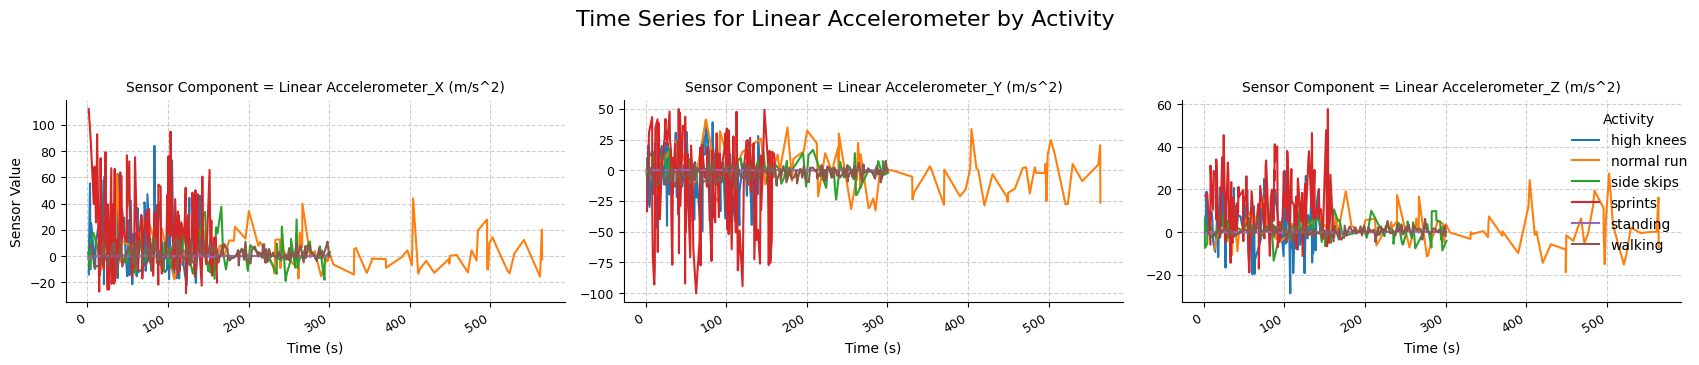


Generating time series plots for Location...


/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/l9/ktthm47x39n329gvdz4tbyyw0000gn/T/ipykernel_19384/2940513412.py:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(current_xticklabels, rotation=30, ha='right', fontsize=9)
/var/folders/l9/ktthm47x39n329gvdz4tbyyw0000gn/T/ipykernel_19384/2940513412.py:111: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.97]) # Adjust rect to prevent suptitle overlap if needed


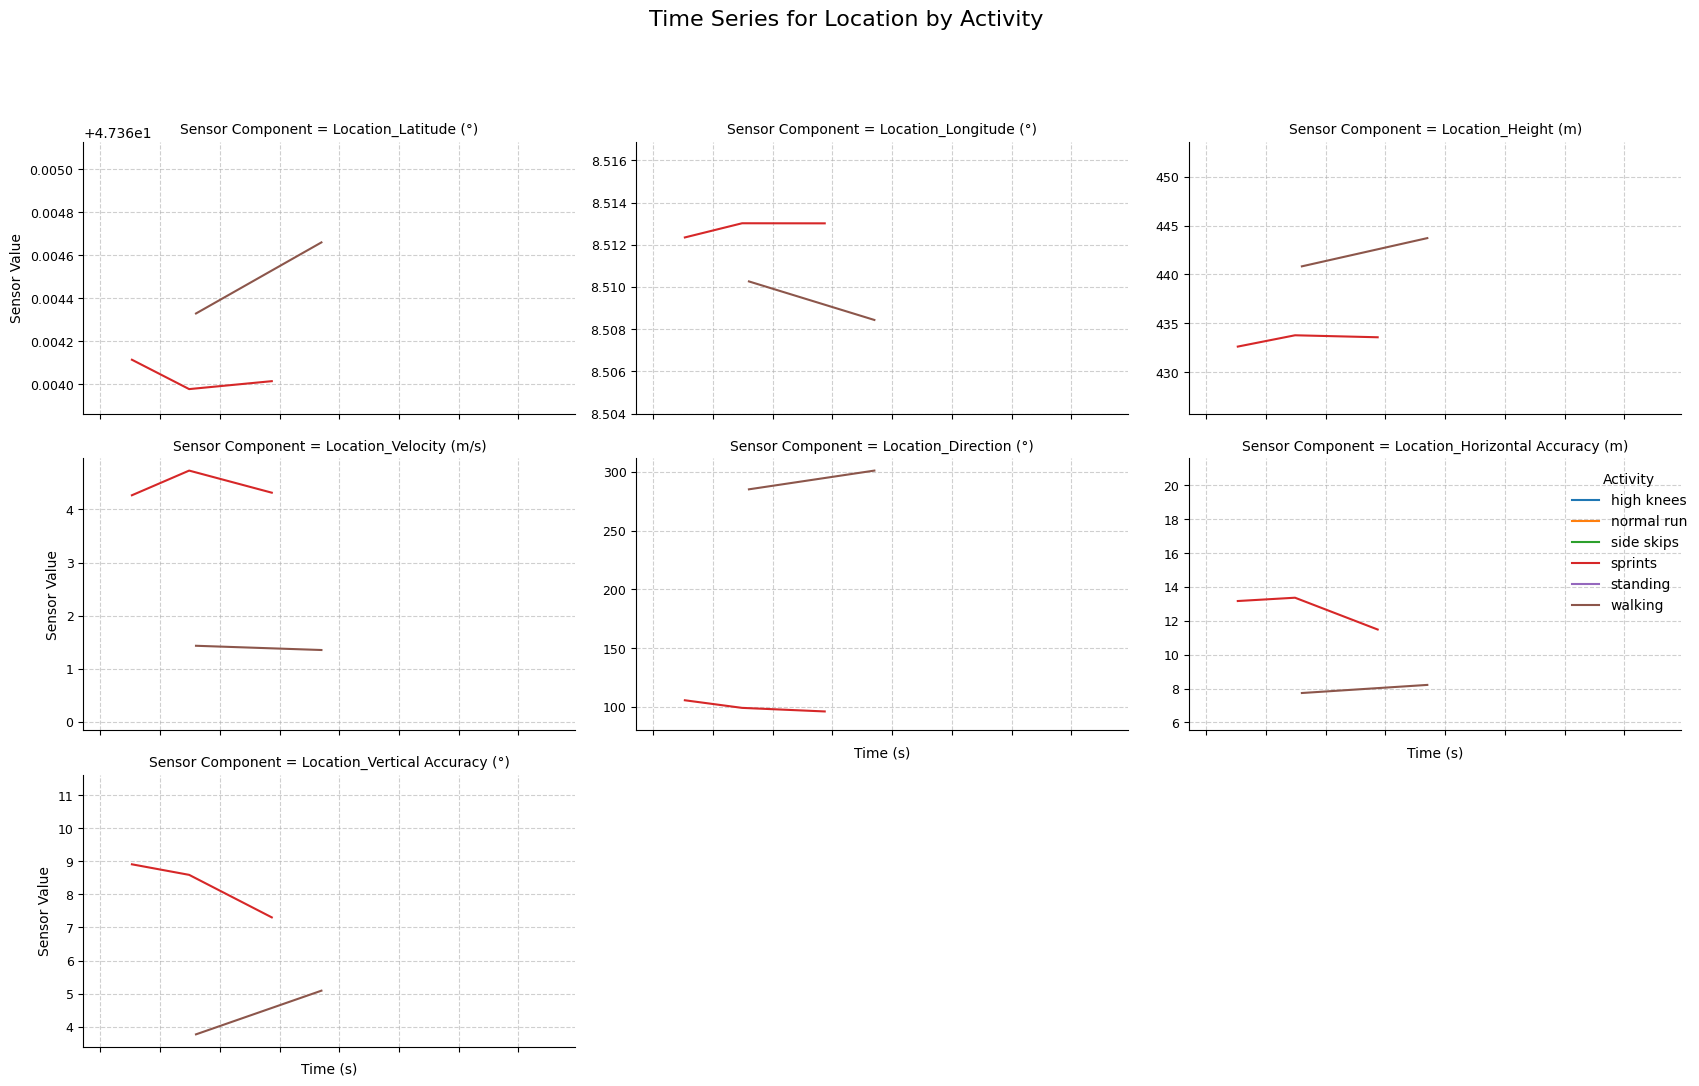


Generating time series plots for Magnetometer...


/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/l9/ktthm47x39n329gvdz4tbyyw0000gn/T/ipykernel_19384/2940513412.py:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(current_xticklabels, rotation=30, ha='right', fontsize=9)
/var/folders/l9/ktthm47x39n329gvdz4tbyyw0000gn/T/ipykernel_19384/2940513412.py:111: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.97]) # Adjust rect to prevent suptitle overlap if needed


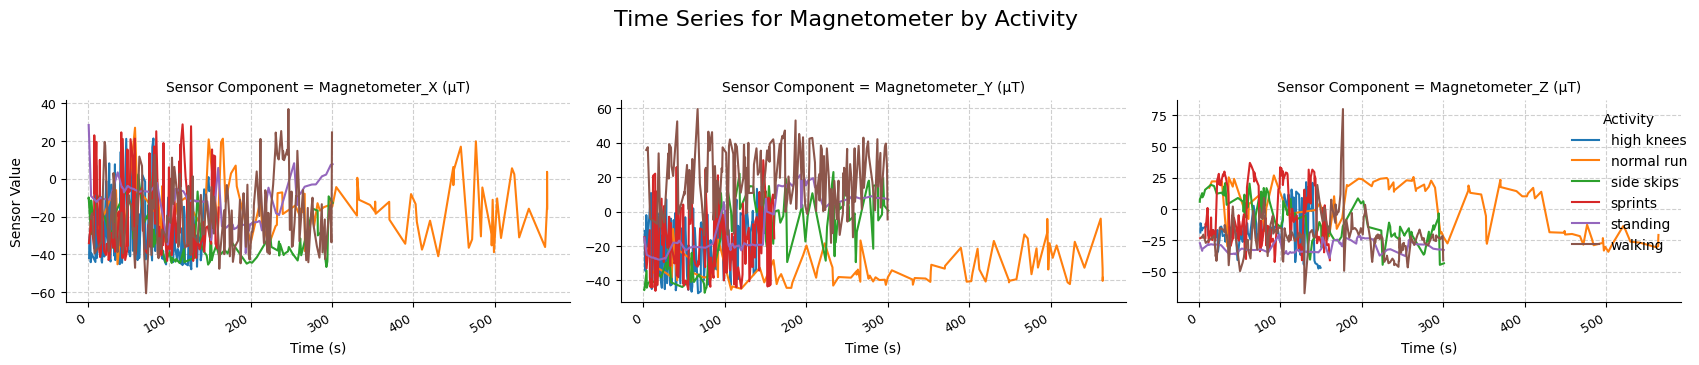


Generating time series plots for Proximity...


/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/l9/ktthm47x39n329gvdz4tbyyw0000gn/T/ipykernel_19384/2940513412.py:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(current_xticklabels, rotation=30, ha='right', fontsize=9)
/var/folders/l9/ktthm47x39n329gvdz4tbyyw0000gn/T/ipykernel_19384/2940513412.py:111: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.97]) # Adjust rect to prevent suptitle overlap if needed


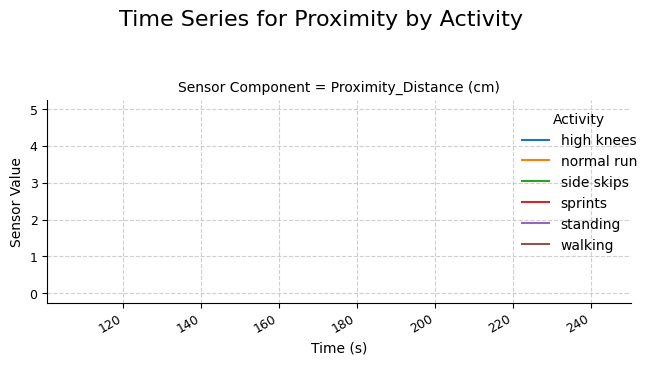

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
try:
    combined_df_full = pd.read_csv('combined_activity_data.csv')
except FileNotFoundError:
    print("Error: 'combined_activity_data.csv' not found. Please ensure the file exists.")
    exit()

# --- Data Preparation ---
combined_df_full['time'] = pd.to_numeric(combined_df_full['time'], errors='coerce')
combined_df_full.dropna(subset=['time'], inplace=True)

# 1. Sampling Strategy for Line Plots
n_points_per_activity_for_plot = 200 
grouped = combined_df_full.groupby('activity_type')
combined_df_sampled = grouped.apply(
    lambda x: x.sample(n=min(len(x), n_points_per_activity_for_plot), random_state=42) if len(x) > 0 else pd.DataFrame()
).reset_index(drop=True)

if combined_df_sampled.empty:
    print("Sampling resulted in an empty DataFrame. Check data and sampling logic.")
    exit()
print(f"Using a sample of up to {n_points_per_activity_for_plot} points per activity for plotting time series.")

# 2. Identify numeric sensor columns
numeric_cols = combined_df_sampled.select_dtypes(include=np.number).columns.tolist()
if 'time' in numeric_cols:
    numeric_cols.remove('time')

# 3. Group columns by base sensor name
original_sensor_files_bases = [
    'Accelerometer', 'Barometer', 'Gyroscope',
    'Linear Accelerometer', 'Location', 'Magnetometer', 'Proximity'
]
sensor_groups = {base: [] for base in original_sensor_files_bases}
other_numeric_cols = []

for col_name_iter in numeric_cols:
    found_group = False
    for base_name in original_sensor_files_bases:
        if col_name_iter.lower().startswith(base_name.lower()):
            sensor_groups[base_name].append(col_name_iter)
            found_group = True
            break
    if not found_group:
        other_numeric_cols.append(col_name_iter)

sensor_groups = {k: v for k, v in sensor_groups.items() if v}

if not sensor_groups:
    print("No sensor data columns found to plot after processing. Please check data and column names.")
else:
    # --- Plotting: One relplot figure per base_sensor_type ---
    for base_sensor_name, component_columns in sensor_groups.items():
        if not component_columns:
            print(f"Skipping {base_sensor_name} as it has no component columns.")
            continue

        print(f"\nGenerating time series plots for {base_sensor_name}...")
        
        df_melted_for_sensor = combined_df_sampled.melt(
            id_vars=['time', 'activity_type'],
            value_vars=component_columns,
            var_name='Sensor Component', 
            value_name='Value'          
        )

        if df_melted_for_sensor.empty:
            print(f"Melted data for {base_sensor_name} is empty. Skipping.")
            continue

        num_components = len(component_columns)
        col_wrap_val = min(num_components, 3) 

        g = sns.relplot(
            data=df_melted_for_sensor,
            x='time',
            y='Value',
            hue='activity_type',
            col='Sensor Component', 
            kind='line',
            col_wrap=col_wrap_val,  
            height=3.5,           
            aspect=1.5,           
            palette='tab10',      
            estimator=None,       
            facet_kws={'sharey': False, 'sharex': True} 
        )
        
        g.fig.suptitle(f'Time Series for {base_sensor_name} by Activity', fontsize=16, y=1.03)
        g.set_axis_labels('Time (s)', 'Sensor Value')
        
        # Corrected tick label handling for each facet's x-axis
        for ax in g.axes.flatten():
            # Get current tick labels to preserve them
            current_xticklabels = [label.get_text() for label in ax.get_xticklabels()]
            # Set x-tick labels with rotation and alignment
            ax.set_xticklabels(current_xticklabels, rotation=30, ha='right', fontsize=9)
            
            ax.tick_params(axis='y', labelsize=9) # For y-axis label size
            ax.grid(True, linestyle='--', alpha=0.6)
            
        if g.legend: # Check if legend exists before trying to set title
            g.legend.set_title('Activity')
            
        plt.tight_layout(rect=[0, 0, 1, 0.97]) # Adjust rect to prevent suptitle overlap if needed
        plt.show()

    if other_numeric_cols:
        print("\nNote: The following numeric columns were not automatically grouped and plotted as time series:")
        for col_name_item in other_numeric_cols:
            print(f"- {col_name_item}")


In [31]:
import pandas as pd
import numpy as np
import re
from collections import defaultdict

# Load the combined data
try:
    combined_df = pd.read_csv('combined_activity_data.csv')
except FileNotFoundError:
    print("Error: 'combined_activity_data.csv' not found. Please ensure the file exists.")
    combined_df = pd.DataFrame()

if combined_df.empty:
    print("DataFrame is empty. Cannot determine window size.")
else:
    # Ensure 'time' column is numeric and sort
    combined_df['time'] = pd.to_numeric(combined_df['time'], errors='coerce')
    combined_df.dropna(subset=['time'], inplace=True)
    combined_df.sort_values(by=['activity_type', 'time'], inplace=True)

    # Define high-frequency base sensor names
    high_freq_base_sensors = [
        'Accelerometer', 'Gyroscope', 'Linear Accelerometer', 'Magnetometer'
    ]

    all_columns = combined_df.columns.tolist()
    
    # Store component columns grouped by their base sensor name
    # and also keep a flat list of all high-frequency components
    high_freq_components_grouped = defaultdict(list)
    all_high_freq_component_cols = []

    for base_name in high_freq_base_sensors:
        for col in all_columns:
            if re.match(f"^{re.escape(base_name)}(_.*|$)", col, re.IGNORECASE):
                if combined_df[col].dtype in [np.float64, np.int64]:
                    high_freq_components_grouped[base_name].append(col)
                    all_high_freq_component_cols.append(col)
    
    all_high_freq_component_cols = sorted(list(set(all_high_freq_component_cols))) # Unique sorted list

    if not all_high_freq_component_cols:
        print("No high-frequency sensor component columns found based on the provided names.")
    else:
        print("Identified high-frequency sensor components for analysis:")
        for comp in all_high_freq_component_cols:
            print(f"- {comp}")
        
        # Store all median intervals for overall calculation
        collected_overall_median_intervals = []
        # Store median intervals per base sensor for the table
        median_intervals_per_base_sensor = defaultdict(list)
        
        activity_types = combined_df['activity_type'].unique()

        for activity in activity_types:
            activity_df = combined_df[combined_df['activity_type'] == activity]
            # print(f"\nProcessing activity: {activity}...") # Less verbose for report output
            
            for base_sensor_name, component_list in high_freq_components_grouped.items():
                for component_col in component_list:
                    sensor_data_points = activity_df[['time', component_col]].dropna(subset=[component_col])
                    sensor_data_points = sensor_data_points.sort_values(by='time')

                    if len(sensor_data_points) < 2:
                        continue
                    
                    time_diffs = sensor_data_points['time'].diff().dropna()
                    time_diffs = time_diffs[time_diffs > 0] 
                    
                    if not time_diffs.empty:
                        median_interval = time_diffs.median()
                        collected_overall_median_intervals.append(median_interval)
                        median_intervals_per_base_sensor[base_sensor_name].append(median_interval)
        
        if collected_overall_median_intervals:
            suggested_window_size = max(collected_overall_median_intervals)
            min_overall_median_interval = min(collected_overall_median_intervals)
            median_overall_median_interval = np.median(collected_overall_median_intervals)

            print("\n--- Overall Window Size Determination ---")
            print(f"Suggested Window Size (Max of Median Inter-Sample Intervals): {suggested_window_size:.8f} seconds")
            print(f"Context - Minimum of Median Inter-Sample Intervals Observed: {min_overall_median_interval:.8f} seconds")
            print(f"Context - Median of All Observed Median Inter-Sample Intervals: {median_overall_median_interval:.8f} seconds")
            
            print("\n--- Summary Table Data for High-Frequency Sensors (Median Inter-Sample Intervals Δt in seconds) ---")
            print(f"{'High-Frequency Sensor':<25} | {'Min Median Δt (s)':<20} | {'Max Median Δt (s)':<20} | {'Avg Median Δt (s)':<20}")
            print("-" * 90)

            table_data_for_report = []
            for base_sensor_name in high_freq_base_sensors: # Iterate in defined order
                intervals = median_intervals_per_base_sensor.get(base_sensor_name)
                if intervals:
                    min_val = min(intervals)
                    max_val = max(intervals)
                    avg_val = np.mean(intervals)
                    print(f"{base_sensor_name:<25} | {min_val:<20.8f} | {max_val:<20.8f} | {avg_val:<20.8f}")
                    table_data_for_report.append({
                        'High-Frequency Sensor': base_sensor_name,
                        'Min Median Δt (s)': min_val,
                        'Max Median Δt (s)': max_val,
                        'Avg Median Δt (s)': avg_val
                    })
                else:
                    print(f"{base_sensor_name:<25} | {'N/A':<20} | {'N/A':<20} | {'N/A':<20}")
                    table_data_for_report.append({
                        'High-Frequency Sensor': base_sensor_name,
                        'Min Median Δt (s)': 'N/A',
                        'Max Median Δt (s)': 'N/A',
                        'Avg Median Δt (s)': 'N/A'
                    })
            
            # You can also convert table_data_for_report to a pandas DataFrame
            # if you want to display it differently or save it.
            # report_df = pd.DataFrame(table_data_for_report)
            # print("\n\nPandas DataFrame version of the summary table:")
            # print(report_df.to_string(index=False))

        else:
            print("\nCould not determine a suggested window size or summary statistics.")
            print("No valid inter-sample intervals were calculated.")


Identified high-frequency sensor components for analysis:
- Accelerometer_X (m/s^2)
- Accelerometer_Y (m/s^2)
- Accelerometer_Z (m/s^2)
- Gyroscope_X (rad/s)
- Gyroscope_Y (rad/s)
- Gyroscope_Z (rad/s)
- Linear Accelerometer_X (m/s^2)
- Linear Accelerometer_Y (m/s^2)
- Linear Accelerometer_Z (m/s^2)
- Magnetometer_X (µT)
- Magnetometer_Y (µT)
- Magnetometer_Z (µT)

--- Overall Window Size Determination ---
Suggested Window Size (Max of Median Inter-Sample Intervals): 0.00999800 seconds
Context - Minimum of Median Inter-Sample Intervals Observed: 0.00999700 seconds
Context - Median of All Observed Median Inter-Sample Intervals: 0.00999751 seconds

--- Summary Table Data for High-Frequency Sensors (Median Inter-Sample Intervals Δt in seconds) ---
High-Frequency Sensor     | Min Median Δt (s)    | Max Median Δt (s)    | Avg Median Δt (s)   
------------------------------------------------------------------------------------------
Accelerometer             | 0.00999700           | 0.009998

In [28]:
import pandas as pd
import numpy as np
import re
from collections import defaultdict

# Load the combined data
try:
    combined_df = pd.read_csv('combined_activity_data.csv')
except FileNotFoundError:
    print("Error: 'combined_activity_data.csv' not found. Please ensure the file exists.")
    combined_df = pd.DataFrame()

if combined_df.empty:
    print("DataFrame is empty. Cannot determine window size.")
else:
    # Ensure 'time' column is numeric and sort
    combined_df['time'] = pd.to_numeric(combined_df['time'], errors='coerce')
    combined_df.dropna(subset=['time'], inplace=True)
    combined_df.sort_values(by=['activity_type', 'time'], inplace=True)

    # Define high-frequency base sensor names
    high_freq_base_sensors = [
        'Accelerometer', 'Gyroscope', 'Linear Accelerometer', 'Magnetometer'
    ]

    all_columns = combined_df.columns.tolist()
    
    high_freq_components_grouped = defaultdict(list)
    all_high_freq_component_cols = []

    for base_name in high_freq_base_sensors:
        for col in all_columns:
            if re.match(f"^{re.escape(base_name)}(_.*|$)", col, re.IGNORECASE):
                if combined_df[col].dtype in [np.float64, np.int64]: # Check if numeric
                    high_freq_components_grouped[base_name].append(col)
                    all_high_freq_component_cols.append(col)
    
    all_high_freq_component_cols = sorted(list(set(all_high_freq_component_cols)))

    if not all_high_freq_component_cols:
        print("No high-frequency sensor component columns found based on the provided names.")
    else:
        print("Identified high-frequency sensor components for analysis:")
        for comp in all_high_freq_component_cols:
            print(f"- {comp}")
        
        collected_overall_median_intervals = []
        median_intervals_per_base_sensor = defaultdict(list)
        
        activity_types = combined_df['activity_type'].unique()

        print("\nCalculating median inter-sample intervals (this might take a moment)...")
        for activity_idx, activity in enumerate(activity_types):
            activity_df = combined_df[combined_df['activity_type'] == activity]
            # Simple progress indicator
            # print(f"  Processing activity {activity_idx+1}/{len(activity_types)}: {activity}") 
            
            for base_sensor_name, component_list in high_freq_components_grouped.items():
                for component_col in component_list:
                    sensor_data_points = activity_df[['time', component_col]].dropna(subset=[component_col])
                    sensor_data_points = sensor_data_points.sort_values(by='time')

                    if len(sensor_data_points) < 2:
                        continue
                    
                    time_diffs = sensor_data_points['time'].diff().dropna()
                    time_diffs = time_diffs[time_diffs > 0] 
                    
                    if not time_diffs.empty:
                        median_interval = time_diffs.median()
                        collected_overall_median_intervals.append(median_interval)
                        median_intervals_per_base_sensor[base_sensor_name].append(median_interval)
        print("Finished calculating intervals.")
        
        if collected_overall_median_intervals:
            suggested_window_size = max(collected_overall_median_intervals)
            min_overall_median_interval = min(collected_overall_median_intervals)
            median_overall_median_interval = np.median(collected_overall_median_intervals)

            print("\n--- Overall Window Size Determination ---")
            print(f"Suggested Window Size (Max of Median Inter-Sample Intervals): {suggested_window_size:.4f} seconds")
            print(f"Context - Minimum of Median Inter-Sample Intervals Observed: {min_overall_median_interval:.4f} seconds")
            print(f"Context - Median of All Observed Median Inter-Sample Intervals: {median_overall_median_interval:.4f} seconds")
            
            print("\n--- Raw Median Intervals Collected per Base Sensor (for debugging) ---")
            for base_sensor_name_debug in high_freq_base_sensors:
                intervals_debug = median_intervals_per_base_sensor.get(base_sensor_name_debug, [])
                print(f"Sensor: {base_sensor_name_debug}, Count: {len(intervals_debug)}")
                # Print first few and last few if list is long, or all if short
                if len(intervals_debug) > 10:
                    print(f"  First 5: {[f'{i:.10f}' for i in intervals_debug[:5]]}") # More precision for debug
                    print(f"  Last 5:  {[f'{i:.10f}' for i in intervals_debug[-5:]]}")
                else:
                    print(f"  All:     {[f'{i:.10f}' for i in intervals_debug]}")


            print("\n--- Summary Table Data for High-Frequency Sensors (Median Inter-Sample Intervals Δt in seconds) ---")
            print(f"{'High-Frequency Sensor':<25} | {'Min Median Δt (s)':<20} | {'Max Median Δt (s)':<20} | {'Avg Median Δt (s)':<20}")
            print("-" * 90)

            table_data_for_report = []
            for base_sensor_name_report in high_freq_base_sensors: 
                intervals_report = median_intervals_per_base_sensor.get(base_sensor_name_report)
                if intervals_report and len(intervals_report) > 0: # Ensure list is not empty
                    min_val = min(intervals_report)
                    max_val = max(intervals_report)
                    avg_val = np.mean(intervals_report)
                    print(f"{base_sensor_name_report:<25} | {min_val:<20.4f} | {max_val:<20.4f} | {avg_val:<20.4f}")
                    table_data_for_report.append({
                        'High-Frequency Sensor': base_sensor_name_report,
                        'Min Median Δt (s)': min_val,
                        'Max Median Δt (s)': max_val,
                        'Avg Median Δt (s)': avg_val
                    })
                else:
                    print(f"{base_sensor_name_report:<25} | {'N/A':<20} | {'N/A':<20} | {'N/A':<20}")
                    table_data_for_report.append({
                        'High-Frequency Sensor': base_sensor_name_report,
                        'Min Median Δt (s)': 'N/A',
                        'Max Median Δt (s)': 'N/A',
                        'Avg Median Δt (s)': 'N/A'
                    })
        else:
            print("\nCould not determine a suggested window size or summary statistics.")
            print("No valid inter-sample intervals were calculated.")

Identified high-frequency sensor components for analysis:
- Accelerometer_X (m/s^2)
- Accelerometer_Y (m/s^2)
- Accelerometer_Z (m/s^2)
- Gyroscope_X (rad/s)
- Gyroscope_Y (rad/s)
- Gyroscope_Z (rad/s)
- Linear Accelerometer_X (m/s^2)
- Linear Accelerometer_Y (m/s^2)
- Linear Accelerometer_Z (m/s^2)
- Magnetometer_X (µT)
- Magnetometer_Y (µT)
- Magnetometer_Z (µT)

Calculating median inter-sample intervals (this might take a moment)...
Finished calculating intervals.

--- Overall Window Size Determination ---
Suggested Window Size (Max of Median Inter-Sample Intervals): 0.0100 seconds
Context - Minimum of Median Inter-Sample Intervals Observed: 0.0100 seconds
Context - Median of All Observed Median Inter-Sample Intervals: 0.0100 seconds

--- Raw Median Intervals Collected per Base Sensor (for debugging) ---
Sensor: Accelerometer, Count: 18
  First 5: ['0.0099980000', '0.0099980000', '0.0099980000', '0.0099970100', '0.0099970100']
  Last 5:  ['0.0099980000', '0.0099980000', '0.009998000

In [35]:
import pandas as pd
import numpy as np
import re
from collections import defaultdict

# Load the combined data
try:
    combined_df = pd.read_csv('combined_activity_data.csv')
except FileNotFoundError:
    print("Error: 'combined_activity_data.csv' not found. Please ensure the file exists.")
    combined_df = pd.DataFrame()

if combined_df.empty:
    print("DataFrame is empty. Cannot determine window size.")
else:
    # Ensure 'time' column is numeric and sort
    combined_df['time'] = pd.to_numeric(combined_df['time'], errors='coerce')
    combined_df.dropna(subset=['time'], inplace=True)
    combined_df.sort_values(by=['activity_type', 'time'], inplace=True)

    # Define high-frequency base sensor names
    high_freq_base_sensors = [
        'Accelerometer', 'Gyroscope', 'Linear Accelerometer', 'Magnetometer'
    ]

    all_columns = combined_df.columns.tolist()
    
    high_freq_components_grouped = defaultdict(list)
    all_high_freq_component_cols = []

    for base_name in high_freq_base_sensors:
        for col in all_columns:
            if re.match(f"^{re.escape(base_name)}(_.*|$)", col, re.IGNORECASE):
                if combined_df[col].dtype in [np.float64, np.int64]:
                    high_freq_components_grouped[base_name].append(col)
                    all_high_freq_component_cols.append(col)
    
    all_high_freq_component_cols = sorted(list(set(all_high_freq_component_cols)))

    if not all_high_freq_component_cols:
        print("No high-frequency sensor component columns found based on the provided names.")
    else:
        print("Identified high-frequency sensor components for analysis:")
        for comp in all_high_freq_component_cols:
            print(f"- {comp}")
        
        # Store all P95 intervals for overall calculation
        collected_overall_p95_intervals = []
        # Store P95 intervals per base sensor for the table
        p95_intervals_per_base_sensor = defaultdict(list)
        
        activity_types = combined_df['activity_type'].unique()

        print("\nCalculating 95th percentile of inter-sample intervals (this might take a moment)...")
        for activity_idx, activity in enumerate(activity_types):
            activity_df = combined_df[combined_df['activity_type'] == activity]
            
            for base_sensor_name, component_list in high_freq_components_grouped.items():
                for component_col in component_list:
                    sensor_data_points = activity_df[['time', component_col]].dropna(subset=[component_col])
                    sensor_data_points = sensor_data_points.sort_values(by='time')

                    if len(sensor_data_points) < 2:
                        continue
                    
                    time_diffs = sensor_data_points['time'].diff().dropna()
                    time_diffs = time_diffs[time_diffs > 0] 
                    
                    if not time_diffs.empty:
                        # Calculate 95th percentile for this component/activity's time_diffs
                        p95_interval = np.percentile(time_diffs, 95)
                        collected_overall_p95_intervals.append(p95_interval)
                        p95_intervals_per_base_sensor[base_sensor_name].append(p95_interval)
        print("Finished calculating P95 intervals.")
        
        if collected_overall_p95_intervals:
            suggested_window_size_p95 = max(collected_overall_p95_intervals)
            min_overall_p95_interval = min(collected_overall_p95_intervals)
            median_overall_p95_interval = np.median(collected_overall_p95_intervals) # Median of the P95s for context

            print("\n--- Overall Window Size Determination (95th Percentile Method) ---")
            print(f"Suggested Window Size (Max of 95th Percentile Inter-Sample Intervals): {suggested_window_size_p95:.4f} seconds")
            print(f"Context - Minimum of 95th Percentile Inter-Sample Intervals Observed: {min_overall_p95_interval:.4f} seconds")
            print(f"Context - Median of All Observed 95th Percentile Inter-Sample Intervals: {median_overall_p95_interval:.4f} seconds")
            
            print("\n--- Summary Table Data (95th Percentile Inter-Sample Intervals P95_Δt in seconds) ---")
            print(f"{'High-Frequency Sensor':<25} | {'Min P95_Δt (s)':<20} | {'Max P95_Δt (s)':<20} | {'Avg P95_Δt (s)':<20}")
            print("-" * 90)

            table_data_for_report_p95 = []
            for base_sensor_name_report in high_freq_base_sensors: 
                intervals_report = p95_intervals_per_base_sensor.get(base_sensor_name_report)
                if intervals_report and len(intervals_report) > 0:
                    min_val = min(intervals_report)
                    max_val = max(intervals_report)
                    avg_val = np.mean(intervals_report)
                    print(f"{base_sensor_name_report:<25} | {min_val:<20.8f} | {max_val:<20.8f} | {avg_val:<20.8f}")
                    table_data_for_report_p95.append({
                        'High-Frequency Sensor': base_sensor_name_report,
                        'Min P95_Δt (s)': min_val,
                        'Max P95_Δt (s)': max_val,
                        'Avg P95_Δt (s)': avg_val
                    })
                else:
                    print(f"{base_sensor_name_report:<25} | {'N/A':<20} | {'N/A':<20} | {'N/A':<20}")
                    table_data_for_report_p95.append({
                        'High-Frequency Sensor': base_sensor_name_report,
                        'Min P95_Δt (s)': 'N/A',
                        'Max P95_Δt (s)': 'N/A',
                        'Avg P95_Δt (s)': 'N/A'
                    })
        else:
            print("\nCould not determine a suggested window size or summary statistics using P95 method.")
            print("No valid inter-sample intervals were calculated.")


Identified high-frequency sensor components for analysis:
- Accelerometer_X (m/s^2)
- Accelerometer_Y (m/s^2)
- Accelerometer_Z (m/s^2)
- Gyroscope_X (rad/s)
- Gyroscope_Y (rad/s)
- Gyroscope_Z (rad/s)
- Linear Accelerometer_X (m/s^2)
- Linear Accelerometer_Y (m/s^2)
- Linear Accelerometer_Z (m/s^2)
- Magnetometer_X (µT)
- Magnetometer_Y (µT)
- Magnetometer_Z (µT)

Calculating 95th percentile of inter-sample intervals (this might take a moment)...
Finished calculating P95 intervals.

--- Overall Window Size Determination (95th Percentile Method) ---
Suggested Window Size (Max of 95th Percentile Inter-Sample Intervals): 0.0100 seconds
Context - Minimum of 95th Percentile Inter-Sample Intervals Observed: 0.0100 seconds
Context - Median of All Observed 95th Percentile Inter-Sample Intervals: 0.0100 seconds

--- Summary Table Data (95th Percentile Inter-Sample Intervals P95_Δt in seconds) ---
High-Frequency Sensor     | Min P95_Δt (s)       | Max P95_Δt (s)       | Avg P95_Δt (s)      
---

Looking for proximity file: Proximity.csv

Unique proximity values found across all activities (after cleaning NaN): [0.0, 5.0]


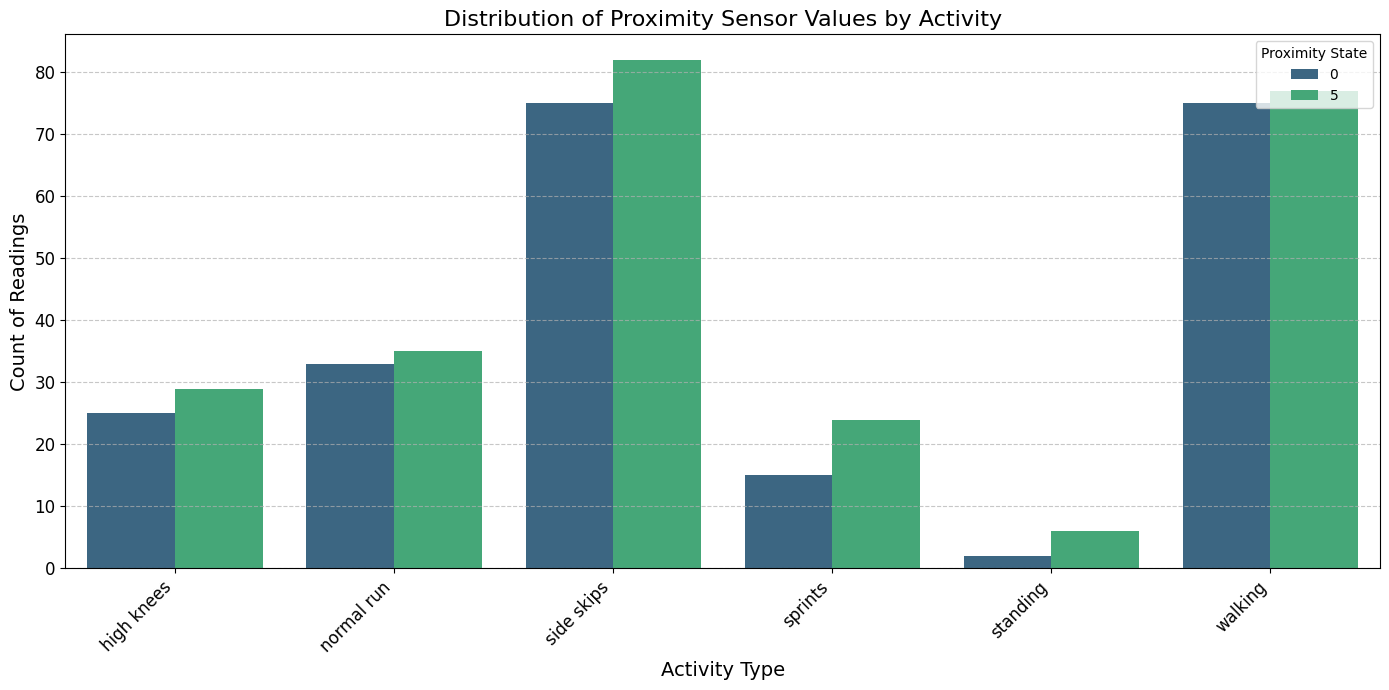

In [38]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re

def analyze_proximity_data():
    base_data_path = 'data'
    activity_folders = ['high knees', 'normal run', 'side skips', 'sprints', 'standing', 'walking']
    proximity_filename = 'Proximity.csv'
    
    all_proximity_data = []

    print(f"Looking for proximity file: {proximity_filename}")

    for activity in activity_folders:
        activity_path = os.path.join(base_data_path, activity)
        file_path = os.path.join(activity_path, proximity_filename)

        if not os.path.exists(file_path):
            print(f"Warning: File not found for activity '{activity}' at '{file_path}'. Skipping.")
            continue

        try:
            df = pd.read_csv(file_path)
            
            time_col_name = None
            value_col_name = None

            # Try to identify time column (case-insensitive)
            for col in df.columns:
                if str(col).lower() == 'time (s)' or str(col).lower() == 'time':
                    time_col_name = col
                    break
            
            # Identify the value column (assume it's the other column, or the first non-time column)
            if time_col_name:
                possible_value_cols = [col for col in df.columns if col != time_col_name]
                if possible_value_cols:
                    value_col_name = possible_value_cols[0] # Take the first non-time column
            elif len(df.columns) == 1: # If only one column, assume it's the value
                 value_col_name = df.columns[0]
            elif len(df.columns) > 1:
                # If no clear time col, guess value col (e.g. first col often has values if no time)
                # Or look for typical names like 'Distance', 'Value', 'Proximity'
                found_val_col = False
                for col in df.columns:
                    if any(keyword in str(col).lower() for keyword in ['distance', 'value', 'prox']):
                        value_col_name = col
                        found_val_col = True
                        break
                if not found_val_col and len(df.columns) > 0: # Default to first column if no better guess
                     value_col_name = df.columns[0]


            if not value_col_name:
                print(f"Warning: Could not determine value column in '{file_path}'. Skipping.")
                continue

            # print(f"Activity: {activity}, Using value column: '{value_col_name}'") # For debugging
            
            # Ensure proximity values are numeric, coercing errors
            df[value_col_name] = pd.to_numeric(df[value_col_name], errors='coerce')

            for value in df[value_col_name]:
                all_proximity_data.append({'activity_type': activity, 'proximity_value': value})
        
        except Exception as e:
            print(f"Error processing file '{file_path}': {e}")
            continue

    if not all_proximity_data:
        print("No proximity data collected. Cannot generate plot.")
        return

    proximity_df = pd.DataFrame(all_proximity_data)
    
    # --- Data Cleaning and Verification ---
    original_row_count = len(proximity_df)
    proximity_df.dropna(subset=['proximity_value'], inplace=True)
    cleaned_row_count = len(proximity_df)
    if original_row_count > cleaned_row_count:
        print(f"\nNote: Removed {original_row_count - cleaned_row_count} rows with missing proximity values.")

    if proximity_df.empty:
        print("No valid proximity data after cleaning. Cannot generate plot.")
        return

    unique_values = proximity_df['proximity_value'].unique()
    print(f"\nUnique proximity values found across all activities (after cleaning NaN): {sorted(list(unique_values))}")

    # Check if values are predominantly 0 and 5
    is_binary_like = all(val in [0.0, 5.0] or np.isclose(val, 0.0) or np.isclose(val, 5.0) for val in unique_values)
    if not is_binary_like:
        print("Warning: Proximity values are not strictly 0 or 5. The plot will show all distinct values found.")
        # For plotting, it might be better to round or map to 0 and 5 if they are very close
        # For now, we'll plot as is or filter for only 0 and 5 for clarity based on user's expectation
    
    # For simplicity in the bar plot based on user expectation, let's focus on 0 and 5
    # Or, if other values exist, we might need a different plot type or to round them.
    # Here, we will cast to int if values are float (e.g. 0.0, 5.0) to simplify grouping for common states
    # And filter for only values that are close to 0 or 5
    proximity_df['proximity_state'] = proximity_df['proximity_value'].apply(
        lambda x: 0 if np.isclose(x, 0.0) else (5 if np.isclose(x, 5.0) else None)
    )
    # Drop rows that didn't map to 0 or 5 if we strictly want to visualize these two states
    proximity_df.dropna(subset=['proximity_state'], inplace=True)
    proximity_df['proximity_state'] = proximity_df['proximity_state'].astype(int)


    if proximity_df.empty:
        print("No proximity data corresponding to states 0 or 5 found after filtering. Cannot plot.")
        return

    # --- Prepare data for plotting ---
    # Count occurrences of 0 and 5 for each activity
    plot_data = proximity_df.groupby(['activity_type', 'proximity_state']).size().reset_index(name='count')
    
    if plot_data.empty:
        print("No data to plot after grouping. Check if proximity states 0 or 5 exist.")
        return

    # --- Create the plot ---
    plt.figure(figsize=(14, 7))
    sns.barplot(
        x='activity_type',
        y='count',
        hue='proximity_state',
        data=plot_data,
        palette='viridis' # Custom colors for 0 and 5
    )
    
    plt.title('Distribution of Proximity Sensor Values by Activity', fontsize=16)
    plt.xlabel('Activity Type', fontsize=14)
    plt.ylabel('Count of Readings', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Proximity State', loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('plots/proximity_distribution.png')
    plt.show()

if __name__ == '__main__':
    analyze_proximity_data()

In [43]:
df_aggregated = pd.read_csv('aggregated_data.csv')

In [48]:
df_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179065 entries, 0 to 179064
Data columns (total 24 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   window_start_time                 179065 non-null  float64
 1   activity_type                     179065 non-null  object 
 2   Proximity_0_count                 179065 non-null  float64
 3   Proximity_5_count                 179065 non-null  float64
 4   Accelerometer_X (m/s^2)           179026 non-null  float64
 5   Accelerometer_Y (m/s^2)           179026 non-null  float64
 6   Accelerometer_Z (m/s^2)           179026 non-null  float64
 7   Barometer_X (hPa)                 1654 non-null    float64
 8   Gyroscope_X (rad/s)               179025 non-null  float64
 9   Gyroscope_Y (rad/s)               179025 non-null  float64
 10  Gyroscope_Z (rad/s)               179025 non-null  float64
 11  Linear Accelerometer_X (m/s^2)    179017 non-null  f

Loaded 'aggregated_data.csv'. Shape: (179065, 24)
Visualizing missingness for 20 features.


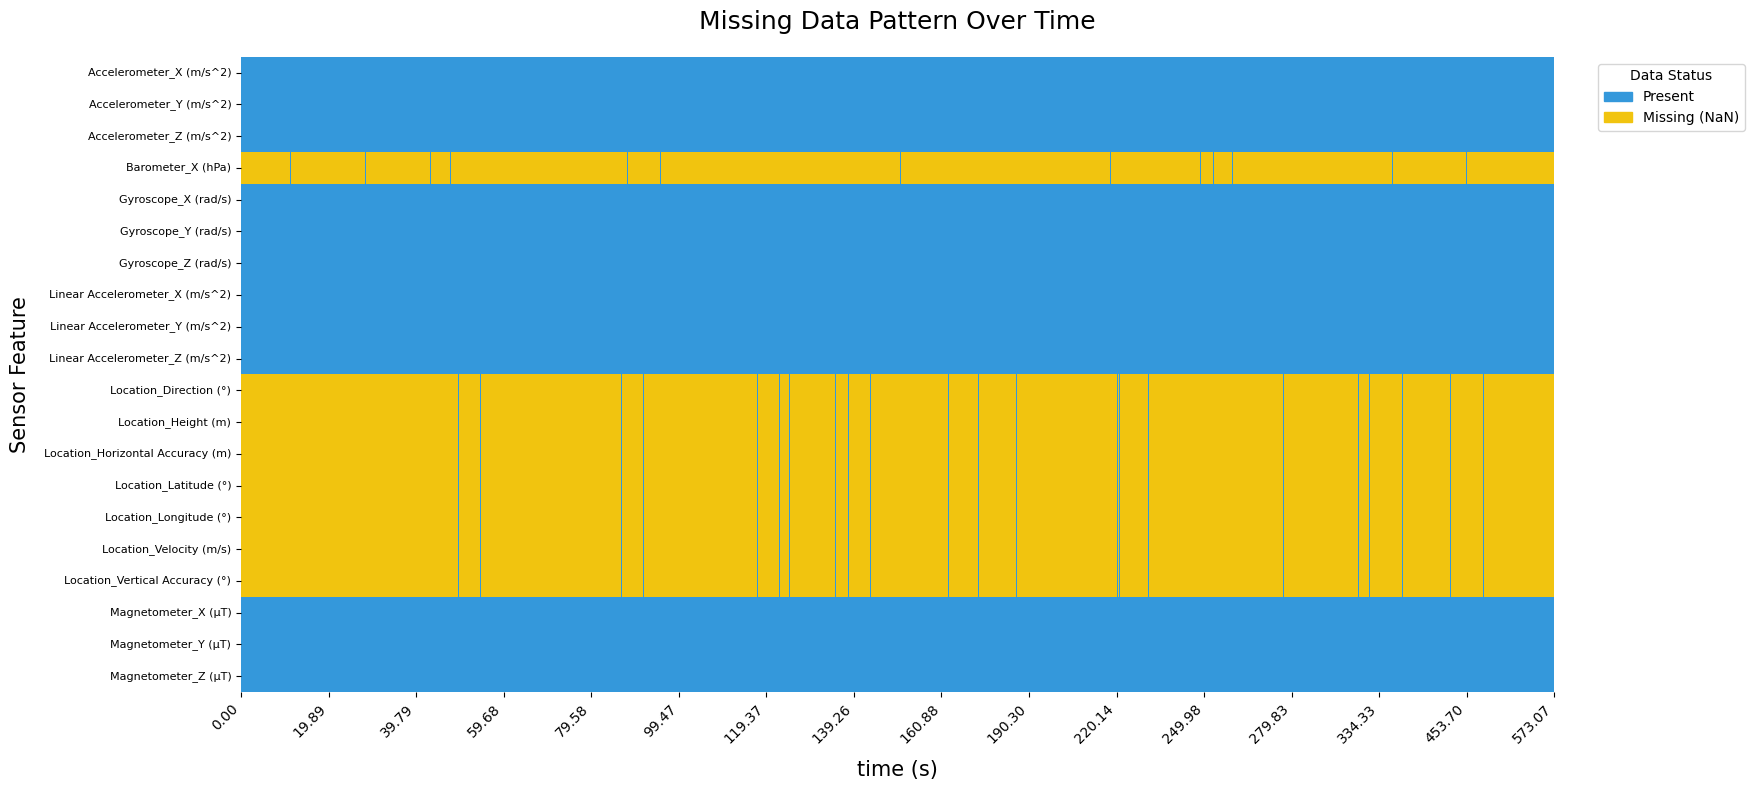

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Configuration ---
aggregated_csv_file = 'aggregated_data.csv' # Make sure this is your aggregated file name
time_column = 'window_start_time' 

try:
    agg_df = pd.read_csv(aggregated_csv_file)
    print(f"Loaded '{aggregated_csv_file}'. Shape: {agg_df.shape}")
except FileNotFoundError:
    print(f"Error: File '{aggregated_csv_file}' not found. Please ensure it exists and the path is correct.")
    agg_df = pd.DataFrame() # Ensure agg_df exists even if empty to avoid error below

if agg_df.empty:
    print("Aggregated DataFrame is empty. Cannot plot missing values.")
else:
    # Ensure time column is sorted
    if time_column not in agg_df.columns:
        print(f"Error: Time column '{time_column}' not found in the DataFrame.")
    else:
        agg_df.sort_values(by=time_column, inplace=True)

        # Identify actual feature columns
        excluded_columns = [time_column, 'activity_type', 'Proximity_0_count', 'Proximity_5_count']
        feature_columns = [col for col in agg_df.columns if col not in excluded_columns]

        if not feature_columns:
            print("No feature columns identified for missing value analysis (after exclusions).")
        else:
            print(f"Visualizing missingness for {len(feature_columns)} features.")
            
            # Create a boolean DataFrame indicating missingness (True for NaN)
            missing_matrix = agg_df[feature_columns].isnull()

            # --- Single Heatmap Plot ---
            plt.figure(figsize=(20, max(8, len(feature_columns) * 0.3))) # Adjust height based on number of features
            
            # Using a simple cmap: 0 for present, 1 for missing.
            # cmap with few distinct colors. 'Greys' can work, or a custom one.
            # Or using 'viridis' and interpreting its ends.
            # Let's try specific colors for True/False for clarity.
            # We can map True to 1 and False to 0, then use a cmap for 0 and 1.
            custom_cmap = sns.color_palette(["#3498db", "#f1c40f"]) # Blue for Present, Yellow for Missing

            sns.heatmap(
                missing_matrix.transpose(), # Features on y-axis, time on x-axis
                cmap=custom_cmap, # Use custom colors
                cbar=False, # No colorbar needed for binary True/False
                yticklabels=True, # Show feature names
                xticklabels=False, # We will set custom x-ticks
            )
            
            # Custom legend for clarity
            legend_elements = [
                plt.Rectangle((0, 0), 1, 1, color=custom_cmap[0], label='Present'),
                plt.Rectangle((0, 0), 1, 1, color=custom_cmap[1], label='Missing (NaN)')
            ]
            plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.15, 1), title="Data Status")


            # Adjust x-ticks for readability (time axis)
            num_time_points = len(agg_df[time_column])
            # Show a manageable number of time ticks, e.g., ~10-20
            step = max(1, num_time_points // 15) 
            tick_indices = np.arange(0, num_time_points, step)
            
            # Heatmap x-ticks correspond to column indices of the *original* (non-transposed) missing_matrix
            # So, these indices are correct.
            tick_labels_time = [f"{agg_df[time_column].iloc[i]:.2f}" for i in tick_indices]

            plt.gca().set_xticks(tick_indices) # Set tick positions
            plt.gca().set_xticklabels(tick_labels_time, rotation=45, ha='right', fontsize=10) # Set tick labels
            
            plt.yticks(fontsize=max(6, 10 - len(feature_columns)//10)) # Adjust y-tick font size based on number of features
            
            plt.title('Missing Data Pattern Over Time', fontsize=18, pad=20)
            plt.xlabel(f'time (s)', fontsize=15, labelpad=10)
            plt.ylabel('Sensor Feature', fontsize=15, labelpad=10)
            
            plt.tight_layout(rect=[0, 0, 0.9, 1]) # Adjust rect to make space for legend
            plt.savefig('plots/missing_data.png')
            plt.show()

In [3]:
df = pd.read_csv('aggregated_data_cleaned.csv')

In [4]:
df.head()

,window_start_time,activity_type,Proximity_0_count,Proximity_5_count,Accelerometer_X (m/s^2),Accelerometer_Y (m/s^2),Accelerometer_Z (m/s^2),Barometer_X (hPa),Gyroscope_X (rad/s),Gyroscope_Y (rad/s),...,Location_Direction (°),Location_Height (m),Location_Horizontal Accuracy (m),Location_Latitude (°),Location_Longitude (°),Location_Velocity (m/s),Location_Vertical Accuracy (°),Magnetometer_X (µT),Magnetometer_Y (µT),Magnetometer_Z (µT)
0,0.022592,high knees,0.0,1.0,-1.987866,8.093070,7.005881,962.936249,-2.149649,-2.085586,...,288.332893,446.917361,13.909812,47.364983,8.506483,0.850265,7.185718,30.541458,-19.370588,-30.912743
1,0.022592,high knees,0.0,0.0,-1.441053,7.954608,9.053473,962.936249,-2.896742,-1.588549,...,288.332893,446.917361,13.909812,47.364983,8.506483,0.850265,7.185718,30.266312,-18.767439,-31.396454
2,0.022592,high knees,0.0,0.0,-0.438887,8.194859,12.630585,962.936249,-3.420725,-0.777714,...,288.332893,446.917361,13.909812,47.364983,8.506483,0.850265,7.185718,30.146378,-18.093246,-31.881290
3,0.032592,high knees,0.0,0.0,1.531166,6.362070,15.098802,962.936249,-3.656501,0.090054,...,288.332893,446.917361,13.909812,47.364983,8.506483,0.850265,7.185718,30.110123,-15.737316,-32.742847
4,0.042592,high knees,0.0,0.0,2.291734,4.058510,16.282091,962.936249,-3.611011,0.425938,...,288.332893,446.917361,13.909812,47.364983,8.506483,0.850265,7.185718,30.369308,-13.869087,-33.561581


In [5]:
df.shape

(179065, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179065 entries, 0 to 179064
Data columns (total 24 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   window_start_time                 179065 non-null  float64
 1   activity_type                     179065 non-null  object 
 2   Proximity_0_count                 179065 non-null  float64
 3   Proximity_5_count                 179065 non-null  float64
 4   Accelerometer_X (m/s^2)           179065 non-null  float64
 5   Accelerometer_Y (m/s^2)           179065 non-null  float64
 6   Accelerometer_Z (m/s^2)           179065 non-null  float64
 7   Barometer_X (hPa)                 179065 non-null  float64
 8   Gyroscope_X (rad/s)               179065 non-null  float64
 9   Gyroscope_Y (rad/s)               179065 non-null  float64
 10  Gyroscope_Z (rad/s)               179065 non-null  float64
 11  Linear Accelerometer_X (m/s^2)    179065 non-null  f